# Lending Club Case study : EDA analysis 

### Steps for EDA ANALYSIS

1. Data understanding
2. Data cleaning 
 a. Fix rows and columns 
 b. Fix missing values 
 c. Standardise values 
3. Univariate analysis  
4. Bivariate analysis 
5. Multivariate analysis
6. Drawing conclusions from the analysis collected

### Data sourcing

1. Dataset provided by upgrad - loan.csv
2. Short description - dataset of bank customer details related to the loan that they have applied for
3. Objective of this EDA - to analyze if a customer poses a risk for defaulting the loan, we are to provide the bank with the details or the possibility of the situations under which a customer has more chances to default the loan.

### STEP 1. DATA UNDERSTANDING

Lets first try to get the basic information from the dataset provided

Importing the libraries and the loading the dataset

### Importing the libraries required

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Lets make sure to ignore the warnings

In [2]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Importing the dataset 

In [4]:
df = pd.read_csv('loan.csv')
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


### Gathering general information about the dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [6]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


### Lets check for the total number of rows and columns in the dataset

In [7]:
rows, columns = df.shape
print(f'Dataset has "{rows}" rows and "{columns}" columns')

Dataset has "39717" rows and "111" columns


### Total number of features present in the dataset

In [8]:
#examples for finding the numerical and categorical values
#df.dtypes['loan_amnt'], output = dtype('int64')  *numerical*
#df.dtypes['grade'], output = dtype('O')    *categorical*

#'for loop' for finding the number of  numerical and categorical columns in the dataset
num, obj = 0,0
for feature in df.columns:
    if df.dtypes[feature] != 'O':
        num += 1
    else:
        obj += 1
print(f'Number of numerical columns in dataset is {num}.')
print(f'Number of categorical columns in dataset is {obj}.')

Number of numerical columns in dataset is 87.
Number of categorical columns in dataset is 24.


##### ANALYSING THE TARGET "loan_status" BY VISUALIZATION

This step is done to get a better idea on the loan status column, as it is a main column for the analysis and provides direct info on whether a customer would default the loan or not

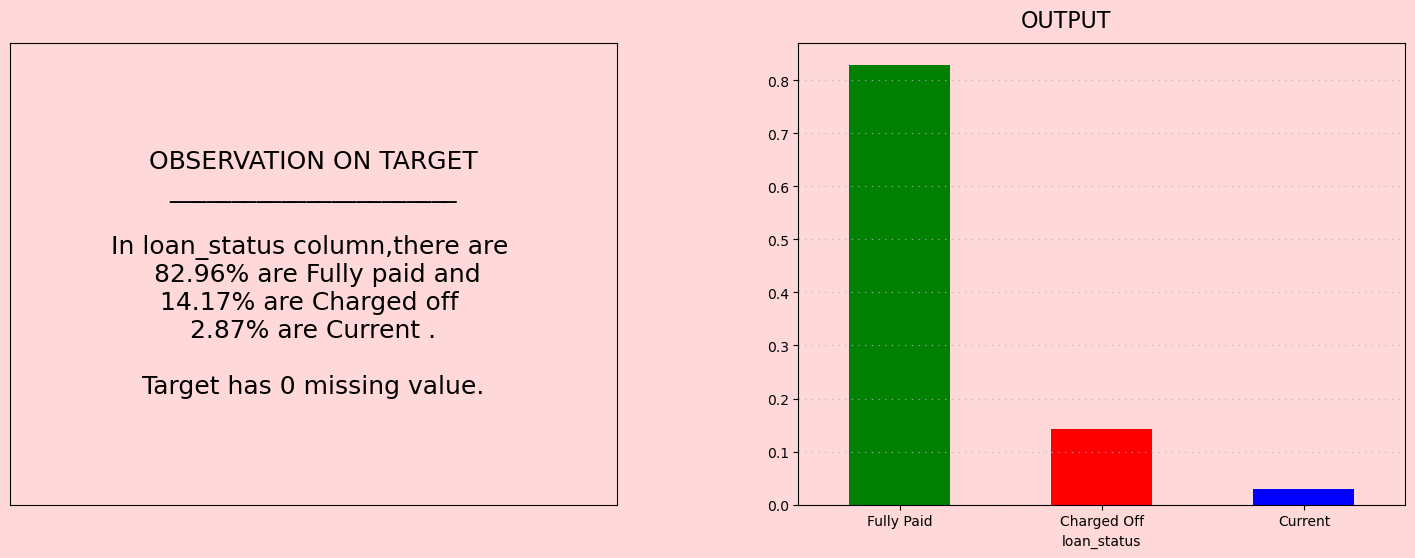

In [9]:
# Creating plot structure
fig = plt.figure(figsize=(18,6))     #creating/plotting figure of 18 inch and 6 inch
spec = fig.add_gridspec(1,2)         #spliting figure by 1:2 using gridspec function
spec.update(wspace=0.3,hspace=0.15)  #adjusting width and height space
sec_1 = fig.add_subplot(spec[0,0])   #naming 1st fig
sec_2 = fig.add_subplot(spec[0,1])   #naming 2nd fig

# Adding color preference
bg_color = '#ffd9d9'                 #background color
for selection in [fig, sec_1, sec_2]:
    selection.set_facecolor(bg_color)  #applying for all fig same color
    
# Plotting graph
df['loan_status'].value_counts(normalize=True).plot.bar(color=['green', 'red', 'blue'])   #normalize value to consolidate the unique values by counting in range of 1
sec_2.grid(linestyle=':', axis='y',  dashes=(1,5))               # linestyle
plt.xticks(rotation=0)
sec_2.text(0.6,0.9,'OUTPUT',fontsize=16)

# Number of missing values
n_vals = df['loan_status'].isnull().sum()

# Narrating the observation
Max, Mid, Min = df['loan_status'].value_counts(normalize=True)*100
Max = np.round(Max, 2)
Mid = np.round(Mid, 2)
Min = np.round(Min, 2)


sec_1.text(0.5,0.5,f"OBSERVATION ON TARGET\n_______________________\n\nIn loan_status column,there are \n {Max}% are Fully paid \
and\n{Mid}% are Charged off \n{Min}% are Current .\n\nTarget has {n_vals} missing value.",
ha='center',va='center',size=18)     # aligning the letters

# Removing axis and spines for 1st sec_1
sec_1.xaxis.set_visible(False)
sec_1.yaxis.set_visible(False)


#### Here we do not require "current" means ongoing loan, since it is irrelevant to our topic. Hence we are removing the rows that contain current loan status from the dataset.

#### COUNT OF UNIQUE VALUES IN LOAN_STATUS AFTER REMOVING CURRENT

In [10]:

# Removing attribute value "Current"
data = df[df['loan_status'] != 'Current']

# Unique count after feature value removal:
print('\nUnique count of "loan_status" after removing Current: ')
print(np.round((data.loan_status.value_counts(normalize=True)*100), 2))


Unique count of "loan_status" after removing Current: 
loan_status
Fully Paid     85.41
Charged Off    14.59
Name: proportion, dtype: float64


Taken copy of "df" as "data"

### Lets look for if there are any duplicate rows in the dataset

In [11]:
# Looking for data duplicates
row, column = data[data.duplicated()].shape
print('There are no duplicates in the dataset.' if row==0 else f'There are {row} duplicates in the dataset.')


There are no duplicates in the dataset.


### Lets look for features with missing values

### Checking null values in columns

In [12]:
df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

### 1. Lets see the number of features that have null values above and below 30%

In [13]:
# Looping to find the missing values

lst_mv_gtr30 = []  # List to store 30% missing value
lst_mv_lsr30 = []  # List to store 30% missing value

for feature in data:                                           # for columns in df, df[columns]
    if (data[feature].isnull().mean()*100) > 30.0:             # Percentage above 30
        lst_mv_gtr30.append(feature)
    elif 0.000 < (data[feature].isnull().mean()*100) < 30.0:   # Percentage between 0 to 30
        lst_mv_lsr30.append(feature)
        
print(f'There are {len(lst_mv_gtr30)} features that has more than 30% missing value.')
print(f'There are {len(lst_mv_lsr30)} features that has less than 30% missing value.')

There are 58 features that has more than 30% missing value.
There are 10 features that has less than 30% missing value.


#### 2. Lets find the number of unique categorical features

In [14]:
# Looping to find the number of unique categorical features
ncc_suv = 0     #number of categorical columns having single unique value 
ncc_nuv = 0     #number of categorical columns having numeours unique value  

for feature in data:
    if data[feature].dtype == 'O' :           # considering only categorical columns from data
        if len(data[feature].unique())==1:    # columns having 1 unique value
            ncc_suv += 1
        else:
            ncc_nuv += 1                       # columns having more than 1 unique values

print(f'There are {ncc_suv} categorical features that has one unique value.')
print(f'There are {ncc_nuv} categorical features that has more than one unique value.')

There are 4 categorical features that has one unique value.
There are 20 categorical features that has more than one unique value.


#####  3. Lets find the number of SINGLE unique categorical features

In [15]:
print("Categorical columns which have single unique value:")
s_uccolumn = []                               # list to store the columns      # single unique of categorical column                  
for feature in data:
    if data[feature].dtype == 'O' :           # considering only categorical columns from data
        if len(data[feature].unique())==1:
            s_uccolumn.append(feature)
s_uccolumn

Categorical columns which have single unique value:


['pymnt_plan', 'initial_list_status', 'next_pymnt_d', 'application_type']

#### 4. Lets find the number of unique numerical features

In [16]:
nnc_suv = 0                    # number of numerical columns having single unique values 
nnc_nuv = 0                    # number of numerical columns having numerous unique values
for feature in data:
    if data[feature].dtype != 'O':            # not equal to object / category 
        if len(data[feature].unique())==1:
            nnc_suv += 1
        else:
            nnc_nuv += 1

print(f'There are {nnc_suv} numerical features that has one unique value including Nan')
print(f'There are {nnc_nuv} numerical features that has more than one unique value')

There are 59 numerical features that has one unique value including Nan
There are 28 numerical features that has more than one unique value


#####  5. Lets find the number of SINGLE unique numerical features

In [17]:
# Looping to find the number of unique numerical features
s_uncolumn = []                   #single unique of numerical column

for feature in data:
    if data[feature].dtype != 'O' and len(data[feature].unique())==1 :  #not equal to object and each columns having single unique value
        if data[feature].isnull().all(axis=0) :          # 0:columns and 1: rows # True will continue, False will break (isnull().all() is summarize result of all either as True or False)
            continue                                     #this line will help to exclude null values of each column from df
        else:
            s_uncolumn.append(feature)

print("Numerical features which having single unique value")            
s_uncolumn

Numerical features which having single unique value


['out_prncp', 'out_prncp_inv', 'policy_code', 'acc_now_delinq', 'delinq_amnt']

### STEP : 2 Data cleaning

### a. Fix rows and columns

#### Lets remove the column which are full of null values first
That is:
* list of feature that has more than 30% missing values.
* list of categorical feature that has one unique value.
* list of numerical feature that has one unique value.

In [18]:
# Merging the list of features to remove
# from itertools import chain
remove_feat = list(lst_mv_gtr30 + s_uccolumn + s_uncolumn)     # mv_gtr30_lst - list of feature that has more than 30% missing values.
                                                             # ucat_lst - list of categorical feature that has one unique value.
                                                             # unum_lst - list of numerical feature that has one unique value.

print(f'Number of features to be removed: {len(remove_feat)}')
print(f'Number of columns in raw data: {data.shape[1]}')

# Removing the list features
data = data.drop(columns = remove_feat)
        
# Data after removing the features
print(f'Number of columns in processed data: {data.shape[1]}')

Number of features to be removed: 67
Number of columns in raw data: 111
Number of columns in processed data: 45


### Lets print the column names after removing the above columns

In [19]:
print(data.columns.values)

['id' 'member_id' 'loan_amnt' 'funded_amnt' 'funded_amnt_inv' 'term'
 'int_rate' 'installment' 'grade' 'sub_grade' 'emp_title' 'emp_length'
 'home_ownership' 'annual_inc' 'verification_status' 'issue_d'
 'loan_status' 'url' 'purpose' 'title' 'zip_code' 'addr_state' 'dti'
 'delinq_2yrs' 'earliest_cr_line' 'inq_last_6mths' 'open_acc' 'pub_rec'
 'revol_bal' 'revol_util' 'total_acc' 'total_pymnt' 'total_pymnt_inv'
 'total_rec_prncp' 'total_rec_int' 'total_rec_late_fee' 'recoveries'
 'collection_recovery_fee' 'last_pymnt_d' 'last_pymnt_amnt'
 'last_credit_pull_d' 'collections_12_mths_ex_med'
 'chargeoff_within_12_mths' 'pub_rec_bankruptcies' 'tax_liens']


* Features such as **"id" , 'member_id', 'url'** has **entirely unique** value.
* Based on the description provided in **data dictionary**,
    * **title** - The loan title provided by the borrower.
    * **emp_title** - The job title supplied by the Borrower when applying for the loan.
    * **zip_code** - The first 3 numbers of the zip code provided by the borrower in the loan application.
    * **last_credit_pull_d** - The most recent month LC pulled credit for this loan.
    * **total_rec_late_fee** - Late fees received to date.
    * **chargeoff_within_12_mths** - Number of charge-offs within 12 months.
    * **delinq_2yrs** - The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years.
    * **last_pymnt_d** - Last month payment was received.
    * **revol_bal** - Total credit revolving balance.
    * **total_pymnt** - Payments received to date for total amount funded.
    * **total_rec_int** - Interest received to date.
    * **total_rec_prncp** - Principal received to date.    
    * **recoveries** - post charge off gross recovery.
    * **last_pymnt_amnt** - Last total payment amount received. 
    * **collection_recovery_fee** - post charge off collection fee.
    * **collections_12_mths_ex_med** - Number of collections in 12 months excluding medical collections.
    * **tax_liens** - Number of tax liens.
    * **earliest_cr_line** - The month the borrower's earliest reported credit line was opened.
    * **addr_state** - Average current balance of all accounts
* These **21 features has no contribution** to analysis by its nature since most of them are **derived post-approval** of loan.
* Therefore 21 features along with **"id" , 'member_id', 'url'** total 24 columns need to be removed.


* As are in the **pursuit of finding the driving factors pre-approval** of loan that leads the customers to default. So, the **above mentioned features can be removed** for further analysis.

In [20]:
# List of features to remove
rmv_lst = ['id', 'member_id', 'url', 'title', 'emp_title', 'zip_code', 'last_credit_pull_d', 
           'total_rec_late_fee', 'chargeoff_within_12_mths', 'delinq_2yrs', 'last_pymnt_d', 'revol_bal', 
            'total_pymnt', 'total_rec_int', 'total_rec_prncp', 'collection_recovery_fee', 
           'last_pymnt_amnt','recoveries', 'collections_12_mths_ex_med', 'tax_liens','earliest_cr_line', 'addr_state']

# Count of features to be removed
print(f'Numbers of features to be removed: {len(rmv_lst)}')

# Count of columns before removing
print(f'Number of columns before removing: {data.shape[1]}')

# Removing the features from the dataframe
data = data.drop(columns = rmv_lst)

# Count of columns after removing
print(f'Number of columns after removed: {data.shape[1]}')

Numbers of features to be removed: 22
Number of columns before removing: 45
Number of columns after removed: 23


### DATA FRAME WITH DATATYPE AND SAMPLE DATA

In [21]:
# Dataframe for datatype
data_type = pd.DataFrame(data.dtypes, columns = ['Data_type'])

# Dataframe for missing percent
data_missing = pd.DataFrame(np.round(data.isnull().mean()*100,2), 
                            columns = ['Missing_percent']) 
# Dataframe for sampledata
sample_data = pd.DataFrame(data.head(2).T)      

# Concatinating the above dataframe
data_concat = pd.concat([data_type, data_missing, sample_data], axis=1) 

# Renaming the dataframe columns
data_concat.rename(columns = {0: 'Columns_1', 
                              1: 'Columns_2'}, inplace = True)       
data_concat

,Data_type,Missing_percent,Columns_1,Columns_2
loan_amnt,int64,0.00,5000,2500
funded_amnt,int64,0.00,5000,2500
funded_amnt_inv,float64,0.00,4975.0,2500.0
term,object,0.00,36 months,60 months
int_rate,object,0.00,10.65%,15.27%
installment,float64,0.00,162.87,59.83
grade,object,0.00,B,C
sub_grade,object,0.00,B2,C4
emp_length,object,2.68,10+ years,< 1 year
home_ownership,object,0.00,RENT,RENT


##### OBSERVATION

* From the above Dataframe,
    * We could convert some categorical colums of  **"term", "int_rate", "revol_util"** to numeric data type for further analysis.
    * Two derived columns namely 'issue_year' and 'issue_month' can be derived from **"issue_d"**.
    * **"emp_length", "revol_util", "pub_rec_bankruptcies"** has missing values and it has to be treated. 

### STEP 2 : Data cleaning

### C. Lets standardize the values for **"term", "int_rate", "revol_util"**
Standardizing the method by which we are going to have all the values in a column in a specific format that we desire

#### CURING "term"
Removing the word term from all the values in the column

In [22]:
data['term'] = data['term'].str.rstrip(" months")  

#### CURING "int_rate" and "revol_util"
Removing the % value from all the values in the int_rate and revol_util columns

In [23]:
# Using rstrip to remove the percentage sign
data['int_rate'] = data['int_rate'].str.rstrip('%')
data['revol_util'] = data['revol_util'].str.rstrip('%')

##### CASTING TO NUMERIC DATA TYPE
Converting the above 3 columns from categorical data type to numerical data type

In [24]:
# Datatype before casting
print('Datatype before casting: ')
print(data[['term','int_rate', 'revol_util']].dtypes)

# Casting to numeric datatype
data[['term','int_rate', 'revol_util']] =data[['term','int_rate', 'revol_util']].apply(pd.to_numeric)     #obj into num

# Datatype after casting
print('\nDatatype after casting: ')
print(data[['term', 'int_rate', 'revol_util']].dtypes)

Datatype before casting: 
term          object
int_rate      object
revol_util    object
dtype: object

Datatype after casting: 
term            int64
int_rate      float64
revol_util    float64
dtype: object


##### Converting the values from the issue_d column which is a categorical column into date-time datatype as we see a potential to create a derived metrics from it

In [25]:
# Data before casting:
print('Data before casting: ')
print(data['issue_d'].head())

# Data casting to datetime format:
data['issue_d'] = pd.to_datetime(data['issue_d'], format='%b-%y')  #abbreviated month, #year #converted into proper structure

# Data after casting:
print('\nData after casting: ')
print(data['issue_d'].head())

Data before casting: 
0    Dec-11
1    Dec-11
2    Dec-11
3    Dec-11
5    Dec-11
Name: issue_d, dtype: object

Data after casting: 
0   2011-12-01
1   2011-12-01
2   2011-12-01
3   2011-12-01
5   2011-12-01
Name: issue_d, dtype: datetime64[ns]


#### DERIVED METRICS


 Lets derive new columns from the existing one's for better analysis

##### Deriving ISSUE_YEAR AND ISSUE_MONTH columns from issue_d column

In [26]:
# Derivng year attribute
data['issue_year']=data['issue_d'].dt.year     #will separate year 

# Deriving month attribute
data['issue_month']=data['issue_d'].dt.month   #will separate month

# Data with derived columns
print('Data sample with derived columns: ')
data[['issue_d', 'issue_year', 'issue_month']].head()

Data sample with derived columns: 


,issue_d,issue_year,issue_month
0,2011-12-01,2011,12
1,2011-12-01,2011,12
2,2011-12-01,2011,12
3,2011-12-01,2011,12
5,2011-12-01,2011,12


### STEP 2:   Data cleaning

  ### b. Fix missing values 

We are filling the missing values depending on the datatype of the column

NATURE OF FEATURES

In [27]:
# Data type of the missing feature
print('Data type of missing features: ')
print(data[["emp_length", "revol_util", "pub_rec_bankruptcies"]].dtypes)

# Number of unique values
print('\nNumber of unique values: ')
print(data[["emp_length", "revol_util", "pub_rec_bankruptcies"]].nunique())


Data type of missing features: 
emp_length               object
revol_util              float64
pub_rec_bankruptcies    float64
dtype: object

Number of unique values: 
emp_length                11
revol_util              1088
pub_rec_bankruptcies       3
dtype: int64


 Since emp_length looks object data type can be replaced by mode
also pub_rec_bankruptcies having small missing values could replace with mode as well

##### Curing pub_rec_bankruptcies

In [29]:
# looking for mean and median for pub_rec_bankruptcies
print('\nMean and meadian for the numerical data-pub_rec_bankruptcies: ')
print('Mean: ',np.round(data["pub_rec_bankruptcies"].mean(),1))
print('Median: ',data["pub_rec_bankruptcies"].quantile(0.5))
print('SD: ',np.round(data["pub_rec_bankruptcies"].std(),1))


Mean and meadian for the numerical data-pub_rec_bankruptcies: 
Mean:  0.0
Median:  0.0
SD:  0.2


Curing revol_util

In [30]:
# looking for mean and median for revol_util
print('\nMean and meadian for the numerical data-revol_util: ')
print('Mean: ',np.round(data["revol_util"].mean(),1))
print('Median: ',data["revol_util"].quantile(0.5))
print('SD: ',np.round(data["revol_util"].std(),1))


Mean and meadian for the numerical data-revol_util: 
Mean:  48.7
Median:  49.1
SD:  28.4


##### OBSERVATION

* Since emp_length is categorical feature missing value can be replaced with mode.
* Even pub_rec_bankruptcies is numerical it has just three unique values and mode acts as best estimator for replacement.
* For revol_util we can replace missing values with either mean or median since the differnce between them is less than 10% of 1-SD.

##### REPLACING MISSING VALUES

In [31]:
# Count of missing values before treatment
print('Count of missing values before treatment: ')
print('emp_length:', data['emp_length'].isnull().sum())
print('pub_rec_bankruptcies:', data['pub_rec_bankruptcies'].isnull().sum())
print('revol_util:', data['revol_util'].isnull().sum())

# Missing value treatment
# Replacing with mode for emp_length and pub_rec_bankruptcies
data['emp_length'] = data['emp_length'].fillna(data['emp_length'].mode()[0])                                        # replaing with 1st mode (repeated) value of the column
data['pub_rec_bankruptcies'] = data['pub_rec_bankruptcies'].fillna(data['pub_rec_bankruptcies'].mode()[0])          # replaing with 1st mode (repeated) value of the column

# Replacing with median for emp_length and pub_rec_bankruptcies
data['revol_util'] = data['revol_util'].fillna(data['revol_util'].median())        # replaing with middle value of the column

# Count of missing values after treatment
print('\nCount of missing values before treatment: ')
print('emp_length:', data['emp_length'].isnull().sum())
print('pub_rec_bankruptcies:', data['pub_rec_bankruptcies'].isnull().sum())
print('revol_util:', data['revol_util'].isnull().sum())

Count of missing values before treatment: 
emp_length: 1033
pub_rec_bankruptcies: 697
revol_util: 50

Count of missing values before treatment: 
emp_length: 0
pub_rec_bankruptcies: 0
revol_util: 0


### FINAL NUMERICAL COLUMN

In [32]:
n_columns = []
for feature in data:
    if data[feature].dtype != 'O':  
        n_columns.append(feature)        
n_columns     

['loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'annual_inc',
 'issue_d',
 'dti',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_util',
 'total_acc',
 'total_pymnt_inv',
 'pub_rec_bankruptcies',
 'issue_year',
 'issue_month']

### STEP 3 : UNIVARIATE ANALYSIS

Numerical univariate visualisation(done to check the range of the spread of the datapoints)

##### UNDERSTANDING THE FEATURE SIMILARITY

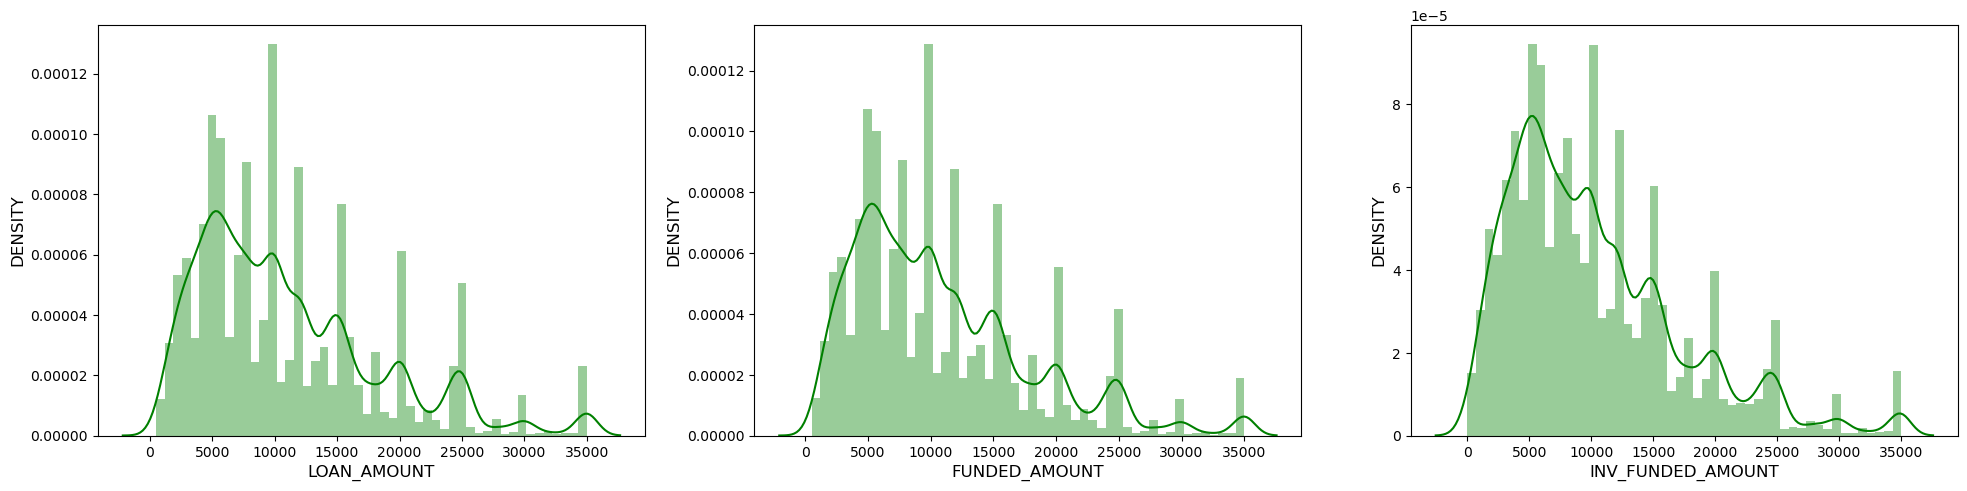

In [33]:
# Creating plots
fig = plt.figure(figsize=(24,40))
spec = fig.add_gridspec(6,3)
spec.update(wspace=0.2, hspace=0.3)
sec_01 = fig.add_subplot(spec[0,0])
sec_02 = fig.add_subplot(spec[0,1])
sec_03 = fig.add_subplot(spec[0,2])

# Adding color preference
bg_color = 'white'
for selection in [fig, sec_01, sec_02, sec_03]:
    selection.set_facecolor(bg_color)

# Plotting the graph
sec = [sec_01, sec_02, sec_03]

cnt = 0
for feature in ['loan_amnt', 'funded_amnt', 'funded_amnt_inv']:
    sns.distplot(data[feature], ax=sec[cnt], color='green')
    sec[cnt].set_ylabel('DENSITY' , fontsize=12)
    cnt+=1
    
sec_01.set_xlabel('LOAN_AMOUNT' , fontsize=12)
sec_02.set_xlabel('FUNDED_AMOUNT' , fontsize=12)
sec_03.set_xlabel('INV_FUNDED_AMOUNT' , fontsize=12)

plt.show()

#### OBSRVATION

* Density distribution for all the three features are similar. Hence, we can proceed forward to anlayse with any of the feature. 
* Based on the nature by description we will proceed forward with "loan_amnt".

##### UNIVARIATE ANALYSIS ON ANNUAL INCOME

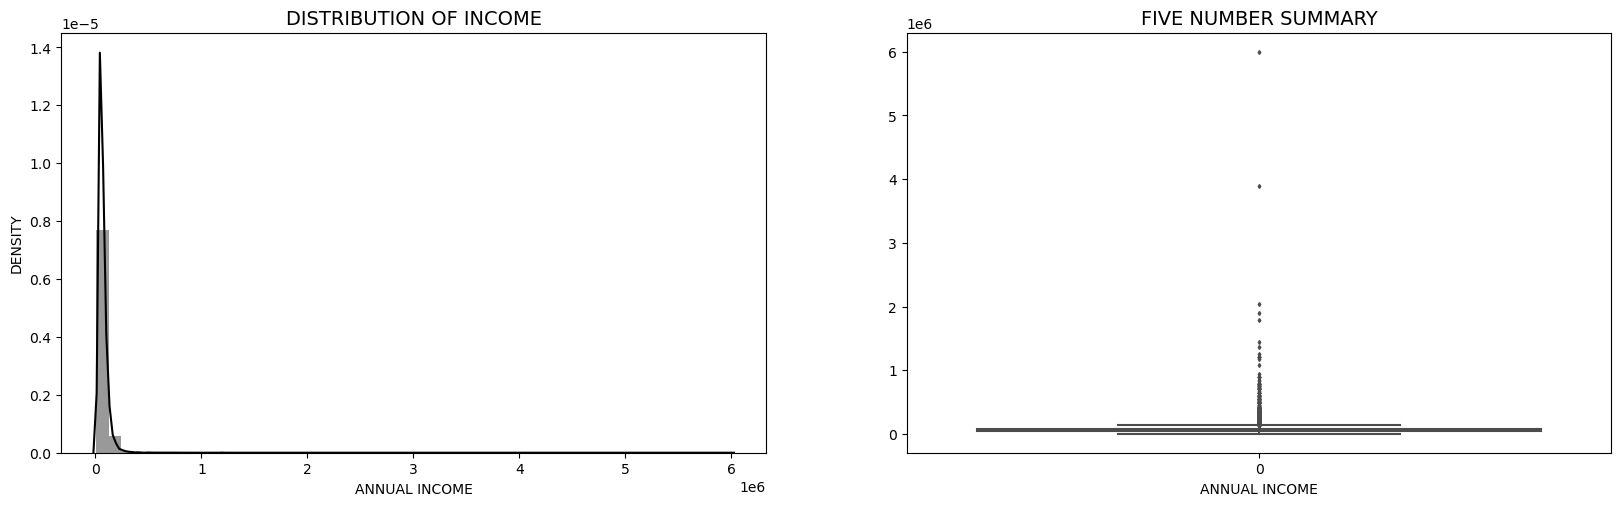

In [34]:
# Distribution plot and outlier plot
# Distribution plot
plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
viz = sns.distplot(data['annual_inc'], color='black')
viz.set_title('DISTRIBUTION OF INCOME',fontsize=14,color='black')
viz.set_ylabel('DENSITY',fontsize =10,color = 'black')
viz.set_xlabel('ANNUAL INCOME',fontsize =10,color = 'black') 

# Outlier plot
plt.subplot(2,2,2)
viz = sns.boxplot(data['annual_inc'], color='red',fliersize=2)
viz.set_title('FIVE NUMBER SUMMARY',fontsize=14,color='black')
viz.set_xlabel('ANNUAL INCOME',fontsize =10,color = 'black')
plt.show()

In [35]:
# Numerical summary
print('Numerical Summary: ')
print('Mean:', data['annual_inc'].mean())
print('Median:', data['annual_inc'].quantile(0.5))
print('90% Data', data['annual_inc'].quantile(0.9))
print('99% Data:', data['annual_inc'].quantile(0.99))
print('100% Data:', data['annual_inc'].quantile(1))

Numerical Summary: 
Mean: 68777.97368120901
Median: 58868.0
90% Data 115000.0
99% Data: 234143.99999999878
100% Data: 6000000.0


##### UNIVARIATE ANALYSIS ON INTEREST RATE

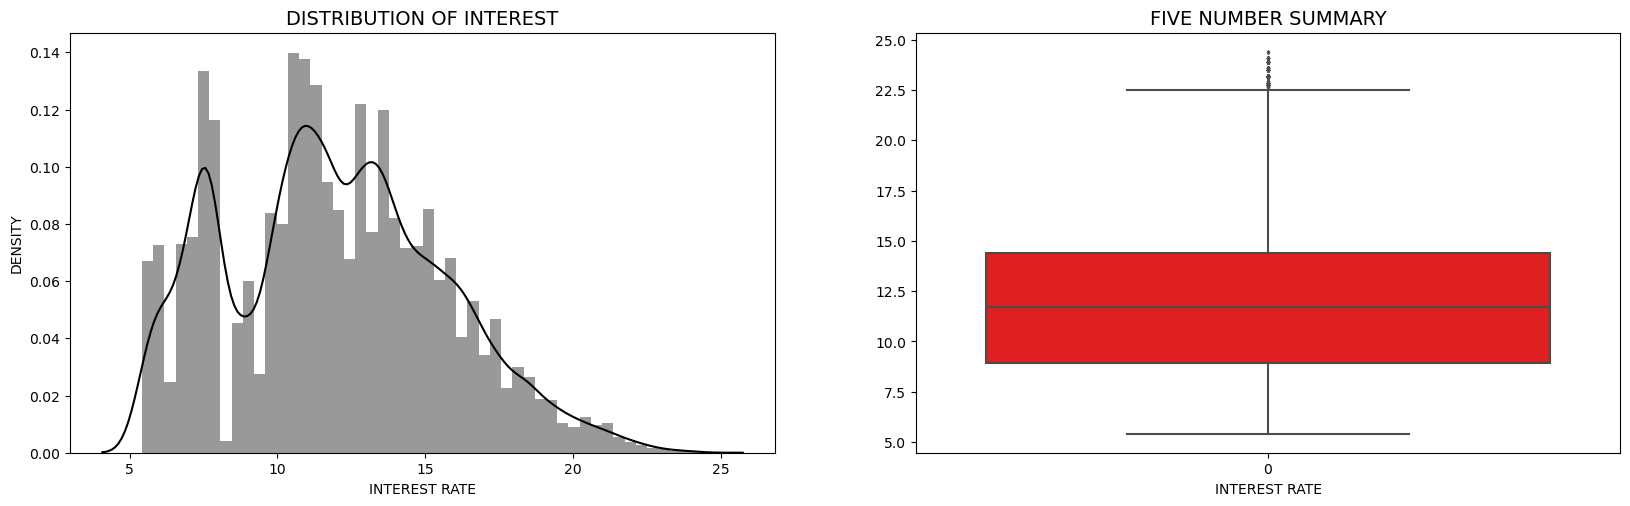

In [36]:
# Distribution plot and outlier plot
# Distribution plot
plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
viz = sns.distplot(data['int_rate'], color='black')
viz.set_title('DISTRIBUTION OF INTEREST',fontsize=14,color='black')
viz.set_ylabel('DENSITY',fontsize =10,color = 'black')
viz.set_xlabel('INTEREST RATE',fontsize =10,color = 'black') 

# Outlier plot
plt.subplot(2,2,2)
viz = sns.boxplot(data['int_rate'], color='red',fliersize=2)
viz.set_title('FIVE NUMBER SUMMARY',fontsize=14,color='black')
viz.set_xlabel('INTEREST RATE',fontsize =10,color = 'black')
plt.show()

In [37]:
# Numerical summary
print('Numerical Summary: ')
print('Average interest rate:',np.round(data['int_rate'].mean()),'%')
print('Interest rate @75 percentile:',np.round(data['int_rate'].quantile(0.75)),'%')
print('Interest rate @90 percentile:',np.round(data['int_rate'].quantile(0.9)),'%')
print('Interest rate @99 percentile:',np.round(data['int_rate'].quantile(0.99)),'%')

Numerical Summary: 
Average interest rate: 12.0 %
Interest rate @75 percentile: 14.0 %
Interest rate @90 percentile: 17.0 %
Interest rate @99 percentile: 21.0 %


##### UNIVARIATE ANALYSIS ON LOAN AMOUNT

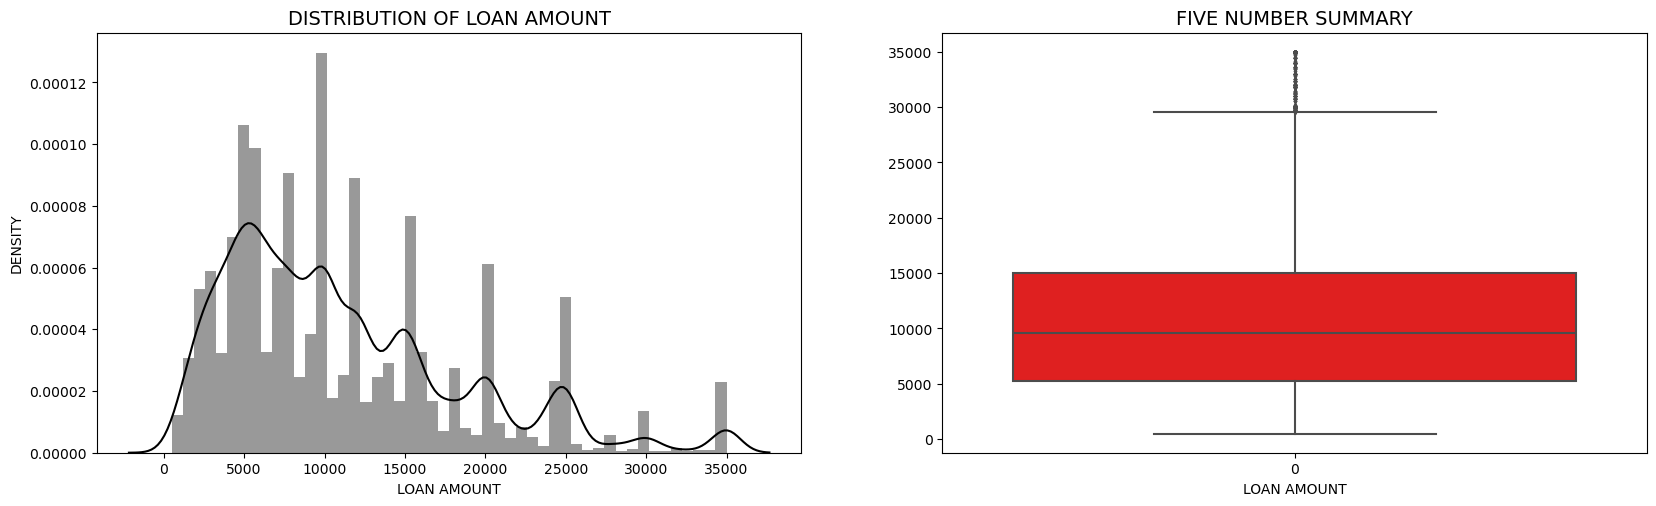

In [38]:
# Distribution plot and outlier plot
# Distribution plot
plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
viz = sns.distplot(data['loan_amnt'], color='black')
viz.set_title('DISTRIBUTION OF LOAN AMOUNT',fontsize=14,color='black')
viz.set_ylabel('DENSITY',fontsize =10,color = 'black')
viz.set_xlabel('LOAN AMOUNT',fontsize =10,color = 'black')   

# Outlier plot
plt.subplot(2,2,2)
viz = sns.boxplot(data['loan_amnt'], color='red',fliersize=2)
viz.set_title('FIVE NUMBER SUMMARY',fontsize=14,color='black')
viz.set_xlabel('LOAN AMOUNT',fontsize =10,color = 'black')  
plt.show()

##### UNIVARIATE ANALYSIS ON LOANS / YEAR AND TENURE

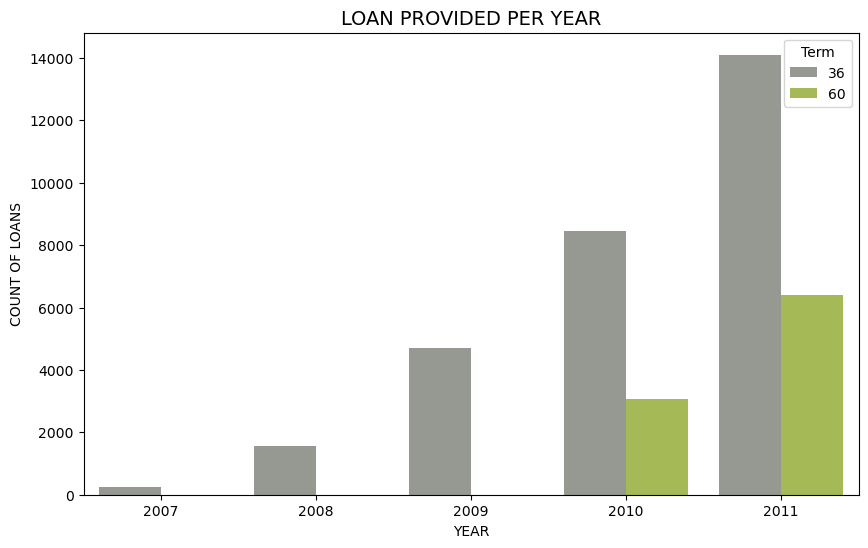

In [39]:
# Creating countplot
data['term'] = data['term'].astype(str)

plt.figure(figsize=(10, 6))
viz = sns.countplot(data=data, 
                    x='issue_year', 
                    hue='term', 
                    order=data['issue_year'].value_counts(ascending=True).index,
                    palette=['#979A90', '#AECB46'])
viz.set_title('LOAN PROVIDED PER YEAR', fontsize=14, color='black')
viz.set_ylabel('COUNT OF LOANS', fontsize=10, color='black')
viz.set_xlabel('YEAR', fontsize=10, color='black')
viz.legend(title='Term', loc='upper right')
plt.show()

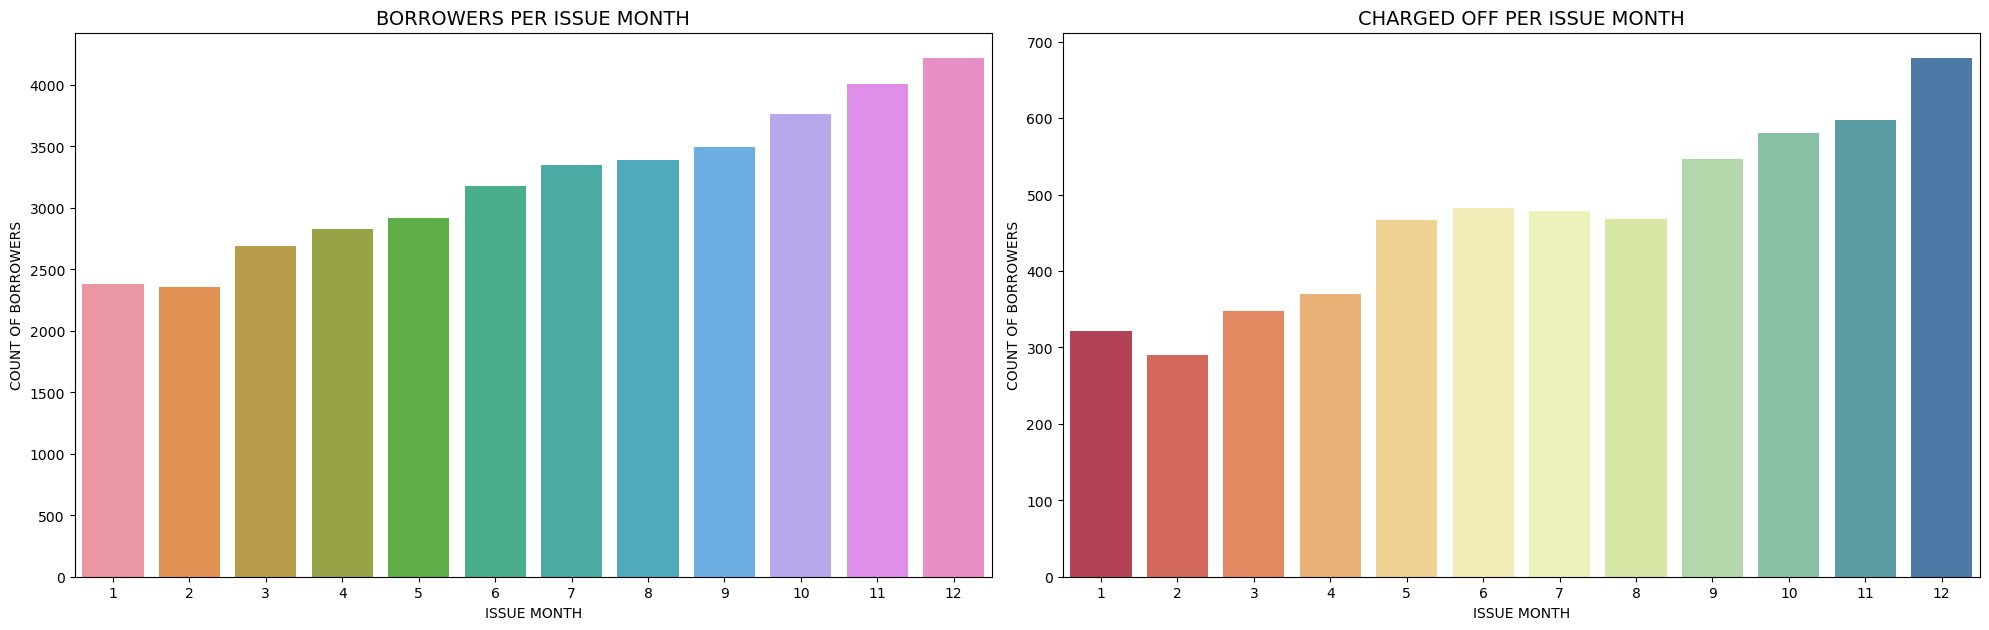

In [40]:
# Count plot for issue month
plt.figure(figsize=(20, 12))

# Subplot 1: Borrowers per issue month
plt.subplot(2, 2, 1)
viz = sns.countplot(x='issue_month', data=data)
viz.set_title('BORROWERS PER ISSUE MONTH', fontsize=14, color='black')
viz.set_ylabel('COUNT OF BORROWERS', fontsize=10, color='black')
viz.set_xlabel('ISSUE MONTH', fontsize=10, color='black')

# Subplot 2: Charged off per issue month
plt.subplot(2, 2, 2)
viz = sns.countplot(x='issue_month', palette='Spectral', data=data[data['loan_status'] == 'Charged Off'])
viz.set_title('CHARGED OFF PER ISSUE MONTH', fontsize=14, color='black')
viz.set_ylabel('COUNT OF BORROWERS', fontsize=10, color='black')
viz.set_xlabel('ISSUE MONTH', fontsize=10, color='black')

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

##### UNIVARIATE ANALYSIS ON PURPOSE OF LOAN

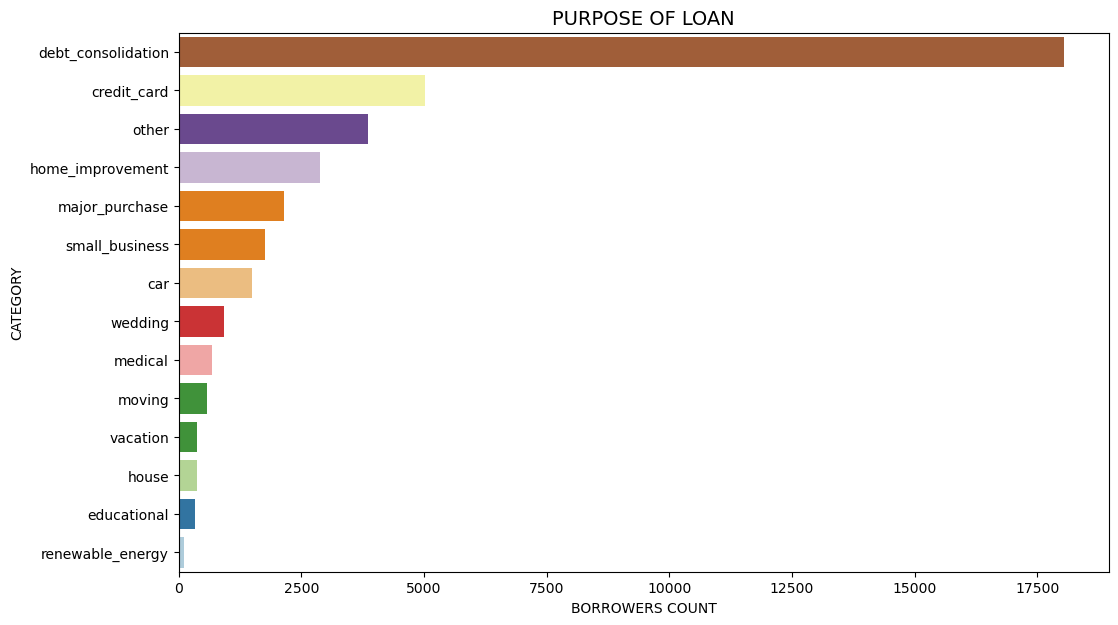

In [41]:
# Countplot for purpose
plt.figure(figsize=(12,7))
viz = sns.countplot(y=data['purpose'], 
                    order=data['purpose'].value_counts().index,
                    palette='Paired_r')
viz.set_title('PURPOSE OF LOAN',fontsize=14,color='black')
viz.set_ylabel('CATEGORY',fontsize =10,color = 'black')
viz.set_xlabel('BORROWERS COUNT',fontsize =10,color = 'black')   
plt.show()

##### UNIVARIATE ANALYSIS ON HOME OWNERSHIP

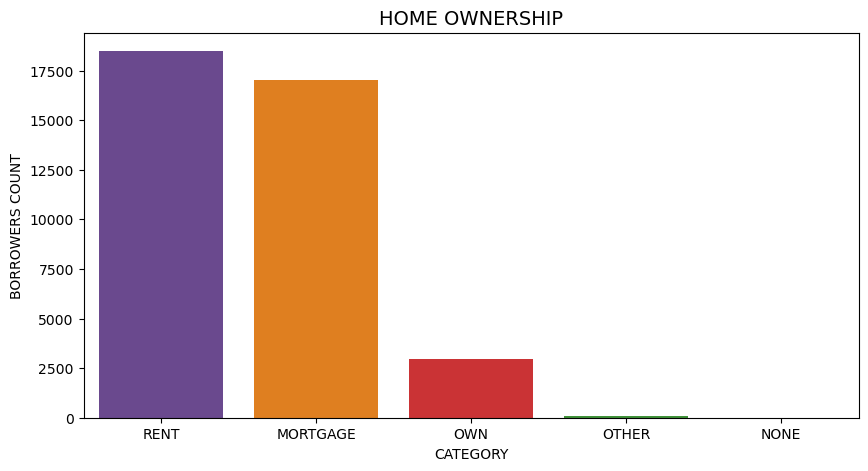

In [42]:
# Countplot for home ownership
plt.figure(figsize=(10, 5))
viz = sns.countplot(x='home_ownership', 
                    data=data, 
                    order=data['home_ownership'].value_counts().index,
                    palette='Paired_r')
viz.set_title('HOME OWNERSHIP', fontsize=14, color='black')
viz.set_xlabel('CATEGORY', fontsize=10, color='black')
viz.set_ylabel('BORROWERS COUNT', fontsize=10, color='black')   
plt.show()

### OBSERVATION ON UNVARIATE ANALYSIS

* Looks like the feature "annual_inc" has outliers in the upper fence.
* There is a huge jump between 99 and 100 % of data in "annual_inc" and that can be trimmed.
* The average interest rate is 12% but there is huge jump after 75 percentile.
* Most of the borrowers prefer to get loan amount between 5k to 15k.
* Almost of the borrowers gets interest rate between 9% to 14%.
* For each year number of borrowers keeps on increasing and they opt for 36 months tenure.
* Loans approved on Q4 are more likely to default.
* Most of the borrowings happens for debt consolidation and credit card bill payment.
* Very least of the borrowers has a own house.

### OUTLIER TREATMENT
If we have the outlier data present in our dataset during the analysis, it would lead to incorrect data analysis, hence we need to eliminate them

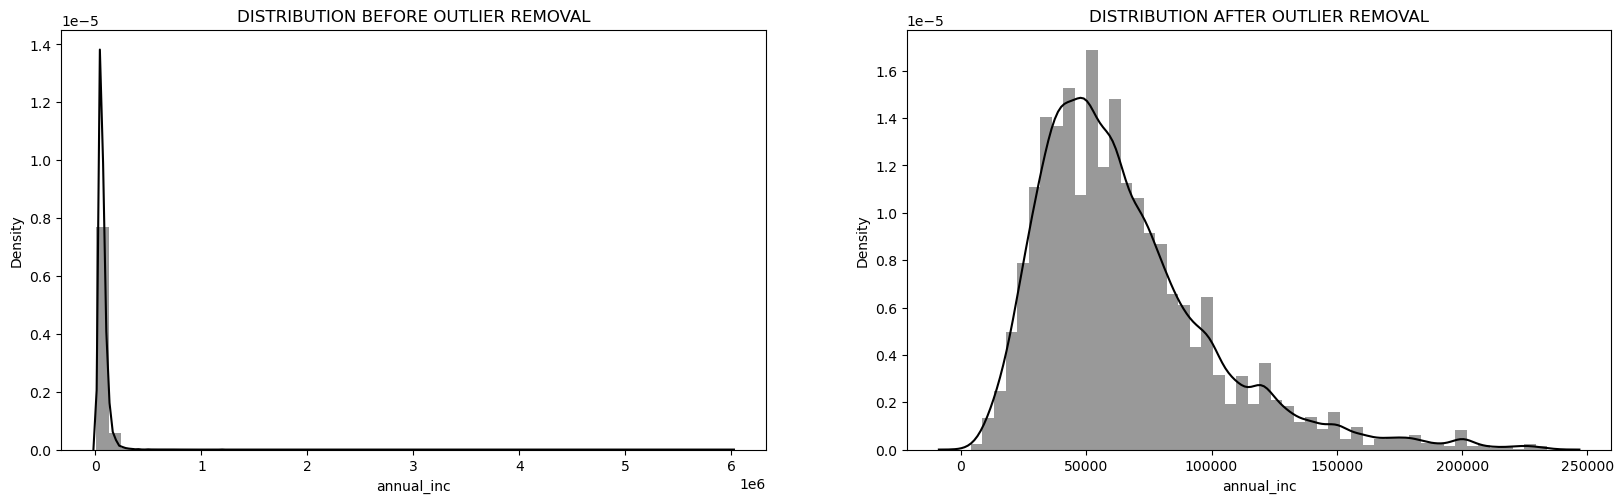

In [43]:
# Removing the data above 99% in upper fence of annual income

# Distribution plot before outlier removal
plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
ax = sns.distplot(data['annual_inc'], color='black')
ax.set_title('DISTRIBUTION BEFORE OUTLIER REMOVAL')

# Removing outliers
data = data[data['annual_inc'] < data['annual_inc'].quantile(0.99)]

# Distribution plot after outlier removal
plt.subplot(2,2,2)
ax = sns.distplot(data['annual_inc'], color='black')
ax.set_title('DISTRIBUTION AFTER OUTLIER REMOVAL')
plt.show()

##### UNDERSTANDING FINANCIAL FEATURES

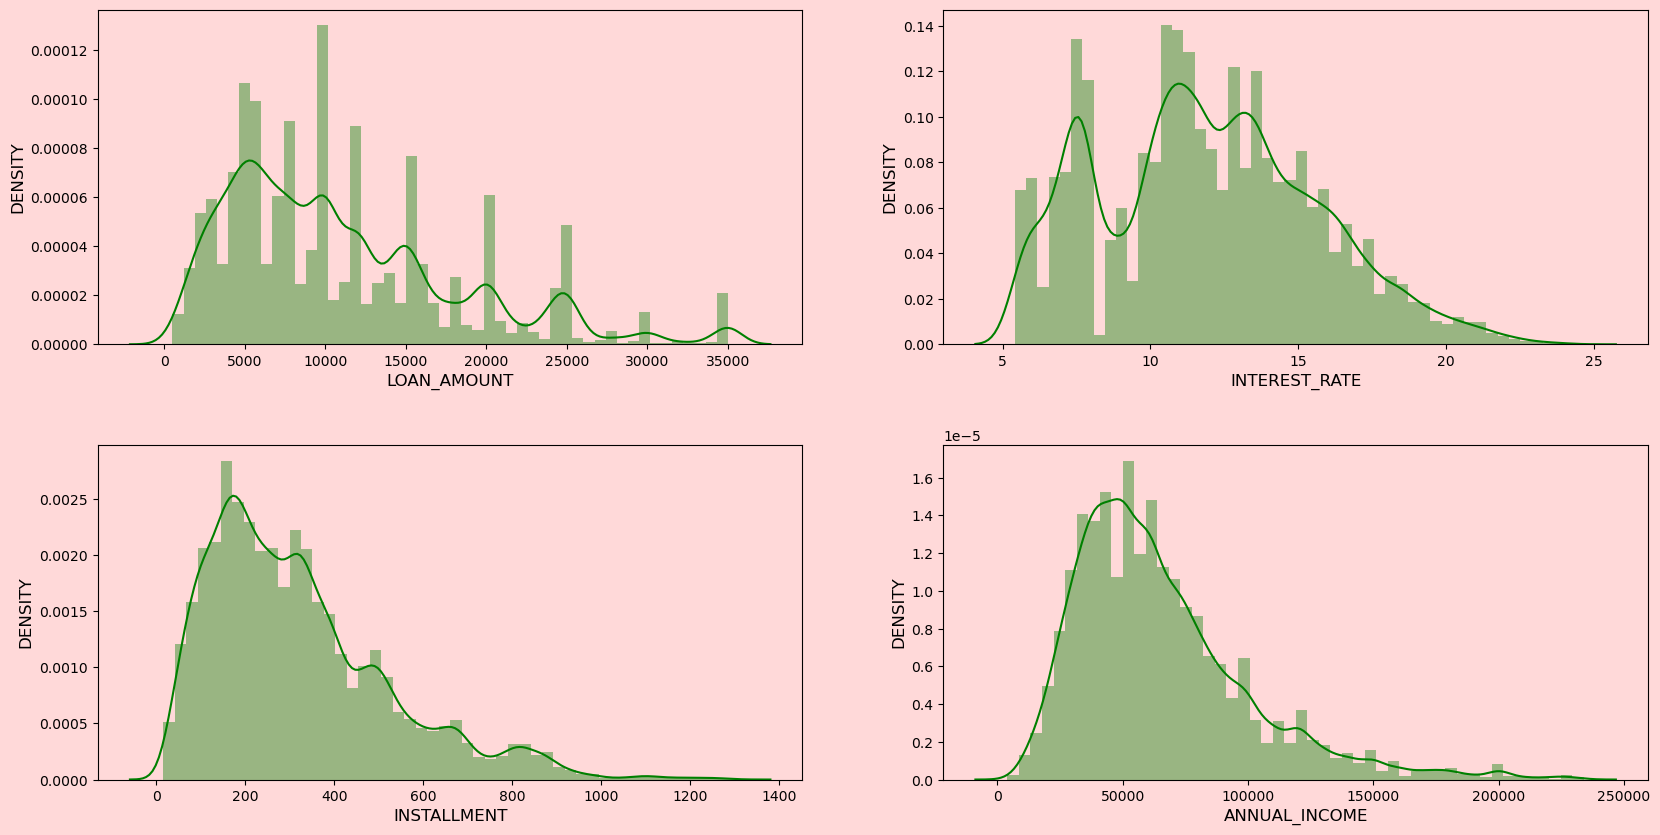

In [44]:
# Creating plots
fig = plt.figure(figsize=(20,10))
spec = fig.add_gridspec(2,2)
spec.update(wspace=0.2, hspace=0.3)
sec_01 = fig.add_subplot(spec[0,0])
sec_02 = fig.add_subplot(spec[0,1])
sec_03 = fig.add_subplot(spec[1,0])
sec_04 = fig.add_subplot(spec[1,1])

# Adding color preference
bg_color = '#ffd9d9'
for selection in [fig, sec_01, sec_02, sec_03, sec_04]:
    selection.set_facecolor(bg_color)

# Plotting the graph
sec = [sec_01, sec_02, sec_03, sec_04]

cnt = 0
for feature in ["loan_amnt", "int_rate", "installment", "annual_inc"]:
    sns.distplot(data[feature], ax=sec[cnt], color='green')
    sec[cnt].set_ylabel('DENSITY' , fontsize=12)
    cnt+=1

# Naming the axis
sec_01.set_xlabel('LOAN_AMOUNT' , fontsize=12)
sec_02.set_xlabel('INTEREST_RATE' , fontsize=12)
sec_03.set_xlabel('INSTALLMENT' , fontsize=12)
sec_04.set_xlabel('ANNUAL_INCOME' , fontsize=12)

plt.show()

Since the data range is so vast, in order to make the analysis simple, we are going to be creating buckets, that is nothing but grouping the entire data into smaller ranges

##### CREATING BUCKETS FOR BIVARIATE ANALYSIS

In [45]:
# Creating categorical buckets for loan amount
data["loan_amnt_bkt"] = pd.cut(data['loan_amnt'], 
                               list(range(0,40001,7000)), 
                               labels = ['0 - 7k', '7k - 14k', '14k - 21k', '21k - 28k', '28k+'])

# Creating categorical buckets for interest rate
data["int_rate_bkt"] = pd.cut(data['int_rate'], 
                               list(range(5,26,5)), 
                               labels = ['5 - 10', '10 - 15', '15 - 20', '20+'])


# Creating categorical buckets for annual income
data['annual_inc_bkt'] = pd.cut(data['annual_inc'],
                                 list(range(0,250001,50000)), 
                                 labels = ['0 - 50k', '50k - 100k', '100k - 150k', '150k - 200k', '200k+'])

# Creating categorical buckets for installment
data["installment_bkt"] = pd.cut(data['installment'], 
                               list(range(0,1401,200)), 
                               labels = ['0 - 200', '200 - 400', '400 - 600', '600 - 800', 
                                         '800 - 1000', '1000 - 12000', '12000+'])


##### VISUALIZING THE BUCKETS

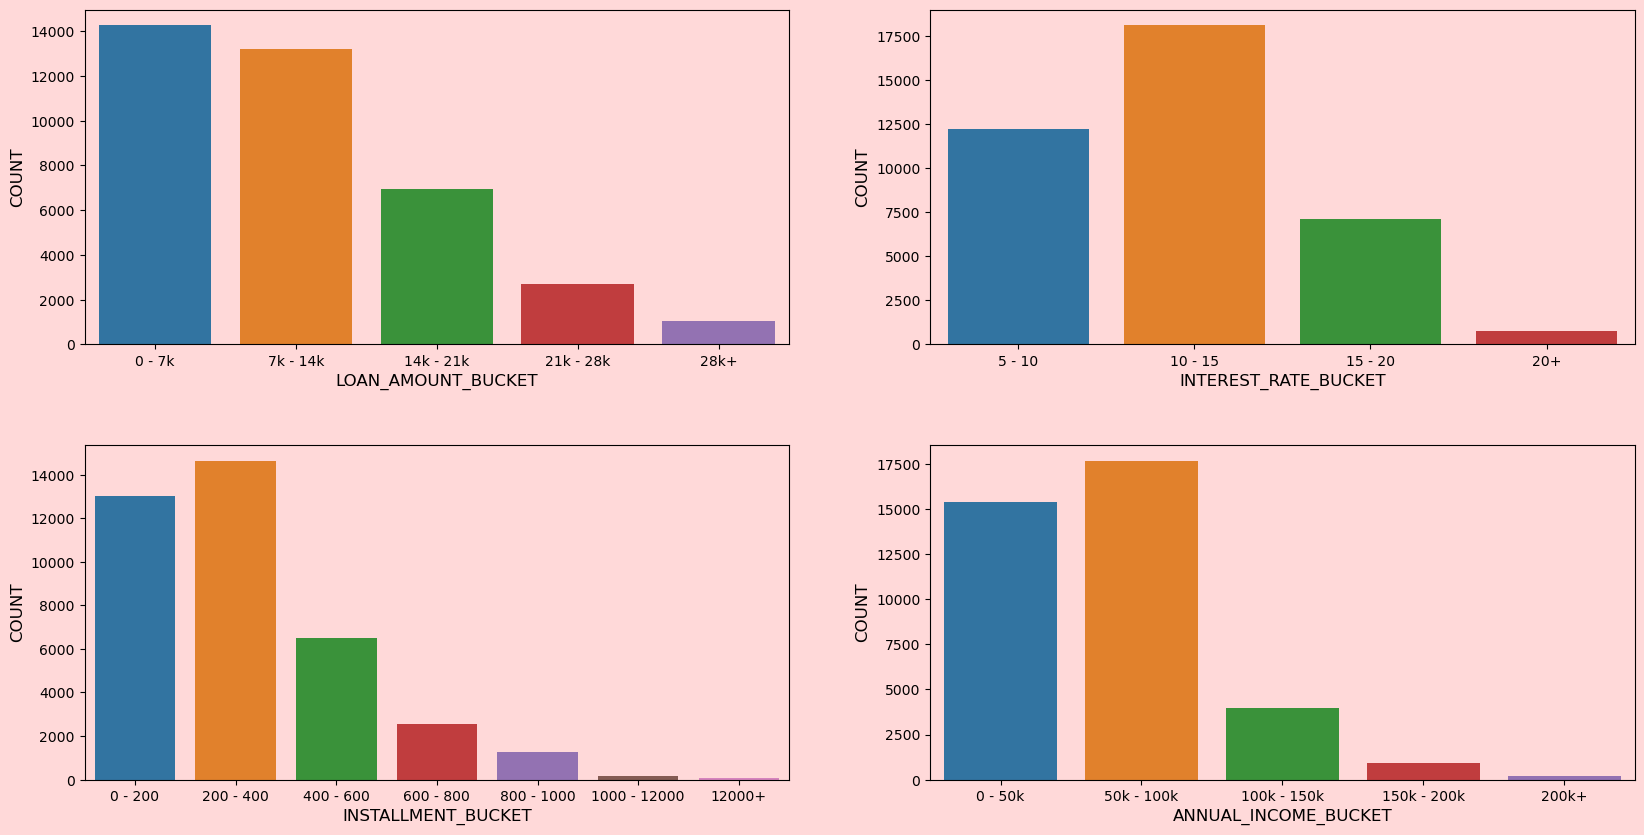

In [46]:
# Creating plots
fig = plt.figure(figsize=(20,10))
spec = fig.add_gridspec(2,2)
spec.update(wspace=0.2, hspace=0.3)
sec_01 = fig.add_subplot(spec[0,0])
sec_02 = fig.add_subplot(spec[0,1])
sec_03 = fig.add_subplot(spec[1,0])
sec_04 = fig.add_subplot(spec[1, 1])

# Adding color preference
bg_color = '#ffd9d9'
for selection in [fig, sec_01, sec_02, sec_03, sec_04]:
    selection.set_facecolor(bg_color)

# Plotting the graph
sec = [sec_01, sec_02, sec_03, sec_04]

for cnt, feature in enumerate(['loan_amnt_bkt', 'int_rate_bkt', 'installment_bkt', 'annual_inc_bkt']):
    sns.countplot(data=data, x=feature, ax=sec[cnt])
    sec[cnt].set_ylabel('COUNT', fontsize=12)

# Naming the axis
sec_01.set_xlabel('LOAN_AMOUNT_BUCKET', fontsize=12)
sec_02.set_xlabel('INTEREST_RATE_BUCKET', fontsize=12)
sec_03.set_xlabel('INSTALLMENT_BUCKET', fontsize=12)
sec_04.set_xlabel('ANNUAL_INCOME_BUCKET', fontsize=12)

plt.show()

### STEP 4 BIVARIATE ANALYSIS
Analysis to find out the relationship between two columns at a time

* Moving forward in bivariate analysis we just need the data of "Charged Off" borrowers.
* So, we create a new dataframe that has only "Charged Off" borrowers data.

In [47]:
# Creating dataframe with feature value "Charged Off":
co_data = data[data['loan_status'] == 'Charged Off']

# Looking into the nature of data:
print(f'The trimmed data has {co_data.shape[0]} rows and {co_data.shape[1]} columns')
print(f'The unique value is {co_data["loan_status"].unique()}')


The trimmed data has 5584 rows and 29 columns
The unique value is ['Charged Off']


##### EMPLOYMENT LENGHT VS LOAN STATUS

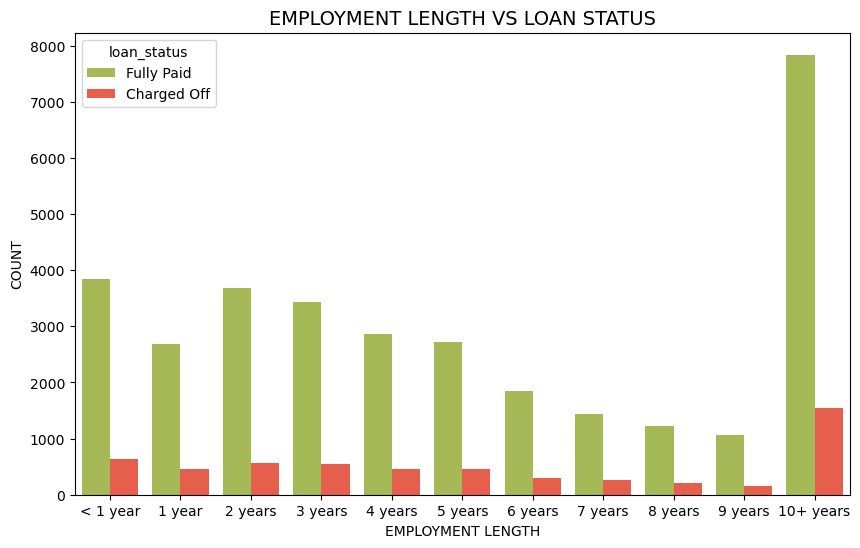

In [48]:
# Countplot for employment length by loan status as hue
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='emp_length',
                   hue='loan_status',
                   order=['< 1 year', '1 year', '2 years', '3 years', '4 years',  
                          '5 years', '6 years', '7 years', '8 years', '9 years', '10+ years'],
                   palette=['#AECB46', "#FF4C33"],
                   data=data)

# Naming the axis and title
ax.set_title('EMPLOYMENT LENGTH VS LOAN STATUS', fontsize=14, color='black')
ax.set_ylabel('COUNT', fontsize=10, color='black')
ax.set_xlabel('EMPLOYMENT LENGTH', fontsize=10, color='black')
plt.show()

##### HOME OWNERSHIP VS LOAN AMOUNT

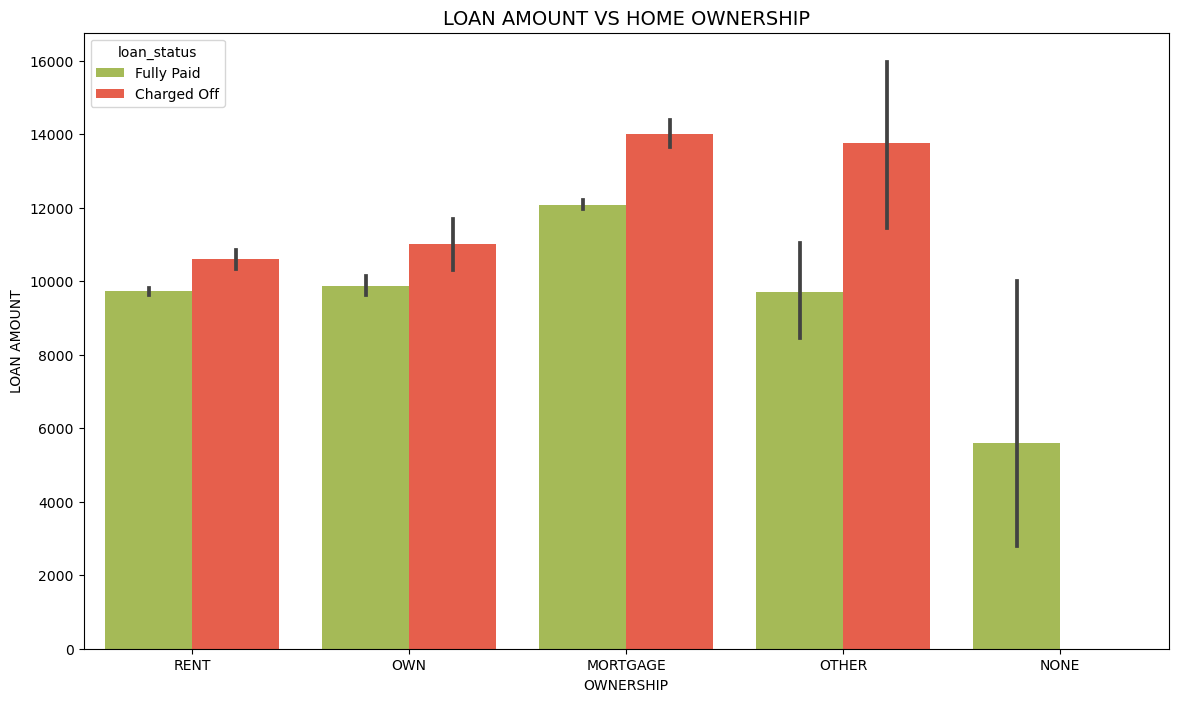

In [49]:
# Bar plot for loan amount by home ownership
plt.figure(figsize=(14,8))
ax = sns.barplot(data =data, 
                 x='home_ownership',
                 y='loan_amnt', 
                 hue ='loan_status',
                 palette=['#AECB46', "#FF4C33"])

# Naming the axis and title
ax.set_title('LOAN AMOUNT VS HOME OWNERSHIP',fontsize=14,color='black')
ax.set_xlabel('OWNERSHIP',fontsize =10,color = 'black')
ax.set_ylabel('LOAN AMOUNT',fontsize =10,color = 'black')
plt.show()

##### LOAN AMOUNT VS PURPOSE

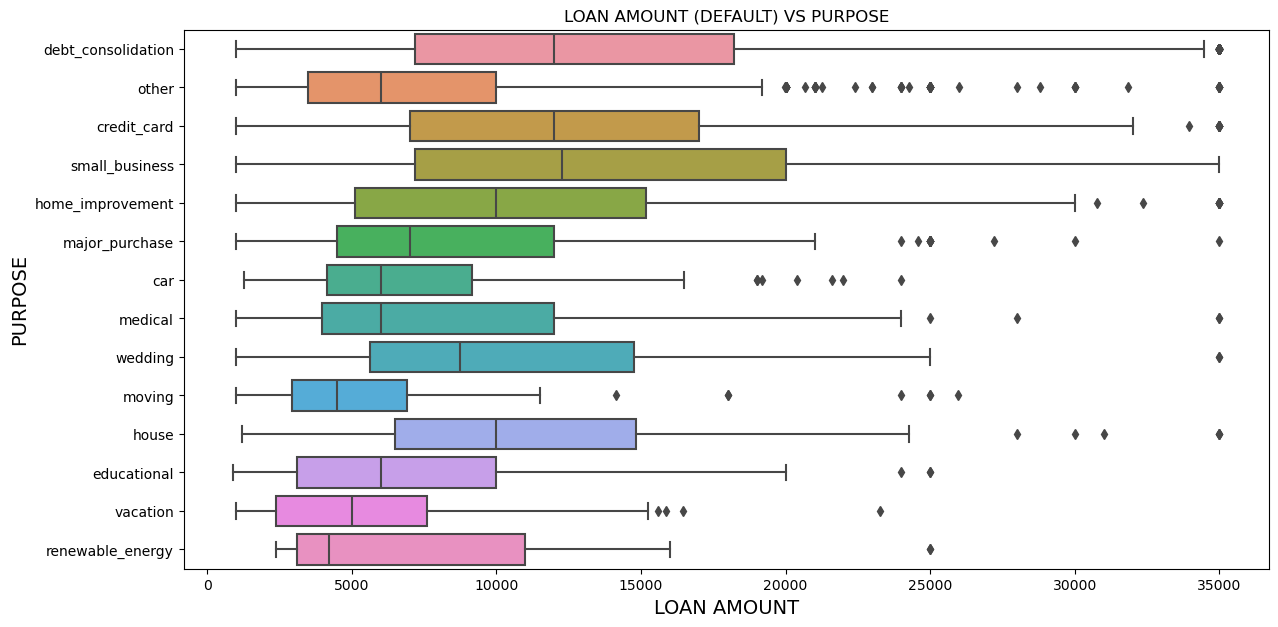

In [50]:
# Box plot for loan amount vs purpose
plt.figure(figsize=(14,7))
viz = sns.boxplot(x='loan_amnt', 
            y='purpose', 
            order=co_data['purpose'].value_counts().index,
            data=co_data)

# Naming the axis and title
viz.set_xlabel('LOAN AMOUNT', fontsize = 14)
viz.set_ylabel('PURPOSE', fontsize = 14)
viz.set_title('LOAN AMOUNT (DEFAULT) VS PURPOSE')
plt.show()

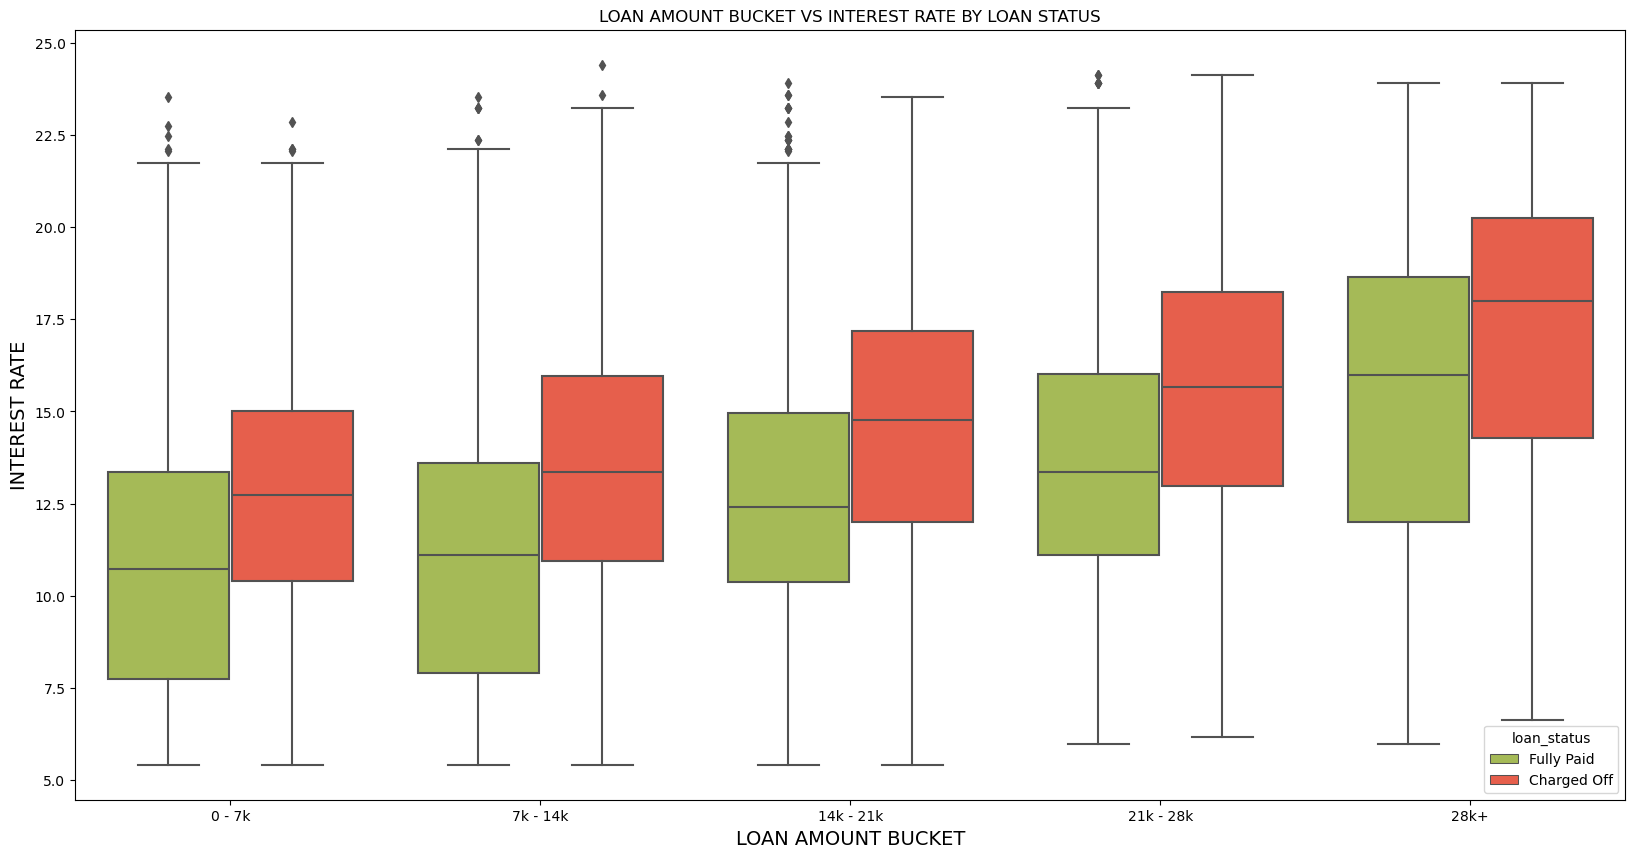

In [64]:
# Box plot for loan amount bucket vs interest rate by loan status as hue
plt.figure(figsize=(20,10))
viz = sns.boxplot(x='loan_amnt_bkt', 
            y='int_rate', 
            hue = 'loan_status',
            order=data['loan_amnt_bkt'].value_counts().index,
            palette=['#AECB46', "#FF4C33"],
            data=data)

# Naming the axis and title
viz.set_xlabel('LOAN AMOUNT BUCKET', fontsize = 14)
viz.set_ylabel('INTEREST RATE', fontsize = 14)
viz.set_title('LOAN AMOUNT BUCKET VS INTEREST RATE BY LOAN STATUS')
plt.show()

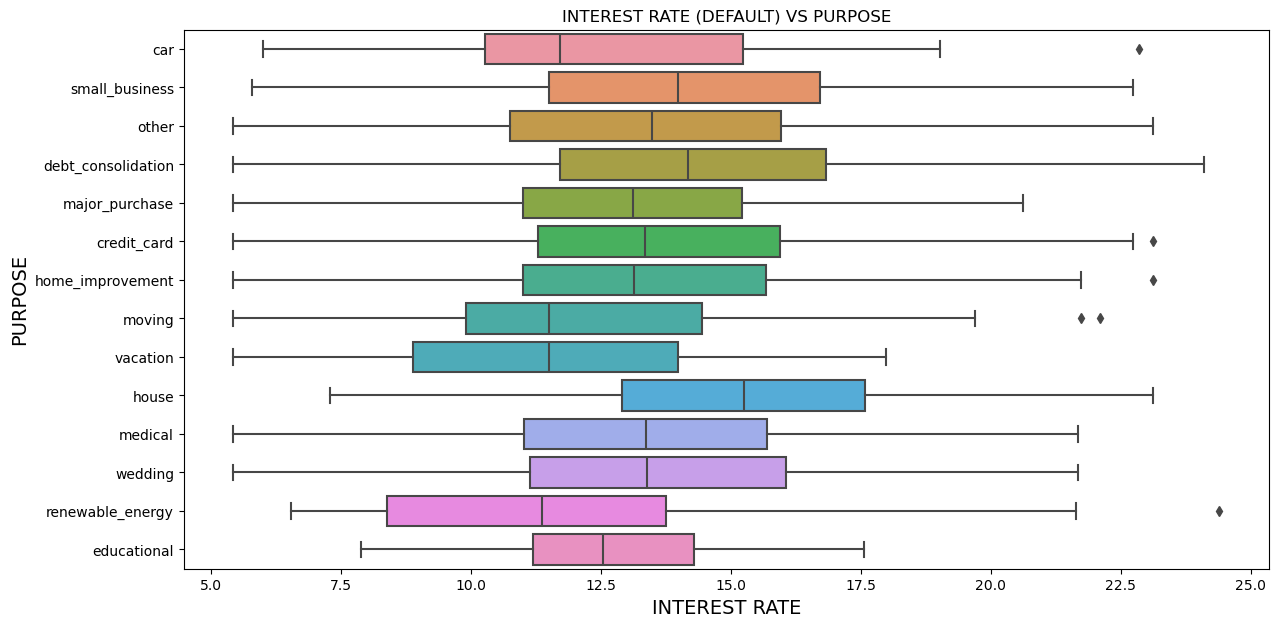

In [52]:
# Box plot for interest rate vs purpose
plt.figure(figsize=(14,7))
viz = sns.boxplot(x='int_rate', 
            y='purpose',
            data=co_data)

# Naming the axis and title
viz.set_xlabel('INTEREST RATE', fontsize = 14)
viz.set_ylabel('PURPOSE', fontsize = 14)
viz.set_title('INTEREST RATE (DEFAULT) VS PURPOSE')
plt.show()

##### INTEREST RATE VS TERM

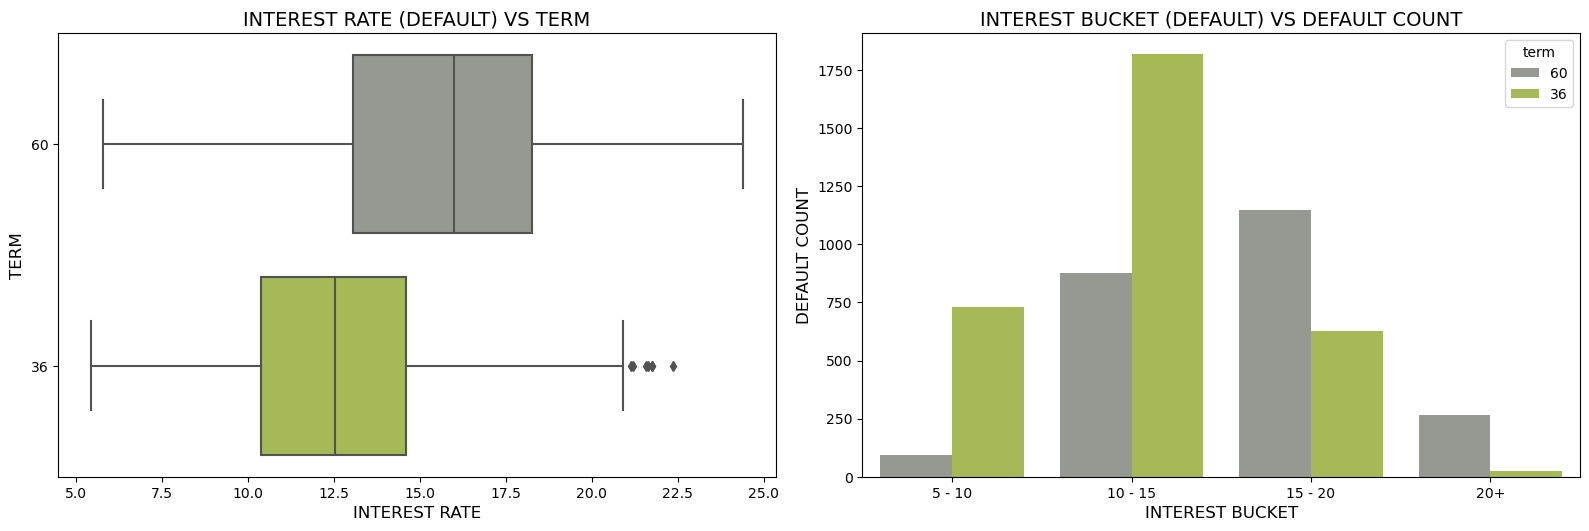

In [53]:
# Box plot for interest rate vs term
plt.figure(figsize=(16, 10))

# Subplot 1: Boxplot for interest rate vs term
plt.subplot(2, 2, 1)
viz = sns.boxplot(x='int_rate', 
                  y='term',
                  palette=['#979A90', '#AECB46'],
                  data=co_data)
# Naming the axis and title
viz.set_xlabel('INTEREST RATE', fontsize=12)
viz.set_ylabel('TERM', fontsize=12)
viz.set_title('INTEREST RATE (DEFAULT) VS TERM', fontsize=14)

# Subplot 2: Count plot for interest rate bucket vs default count by term as hue
plt.subplot(2, 2, 2)
viz = sns.countplot(x='int_rate_bkt',
                    hue='term', 
                    palette=['#979A90', '#AECB46'],
                    data=co_data)
# Naming the axis and title
viz.set_xlabel('INTEREST BUCKET', fontsize=12)
viz.set_ylabel('DEFAULT COUNT', fontsize=12)
viz.set_title('INTEREST BUCKET (DEFAULT) VS DEFAULT COUNT', fontsize=14)

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

##### LOAN AMOUNT VS GRADE

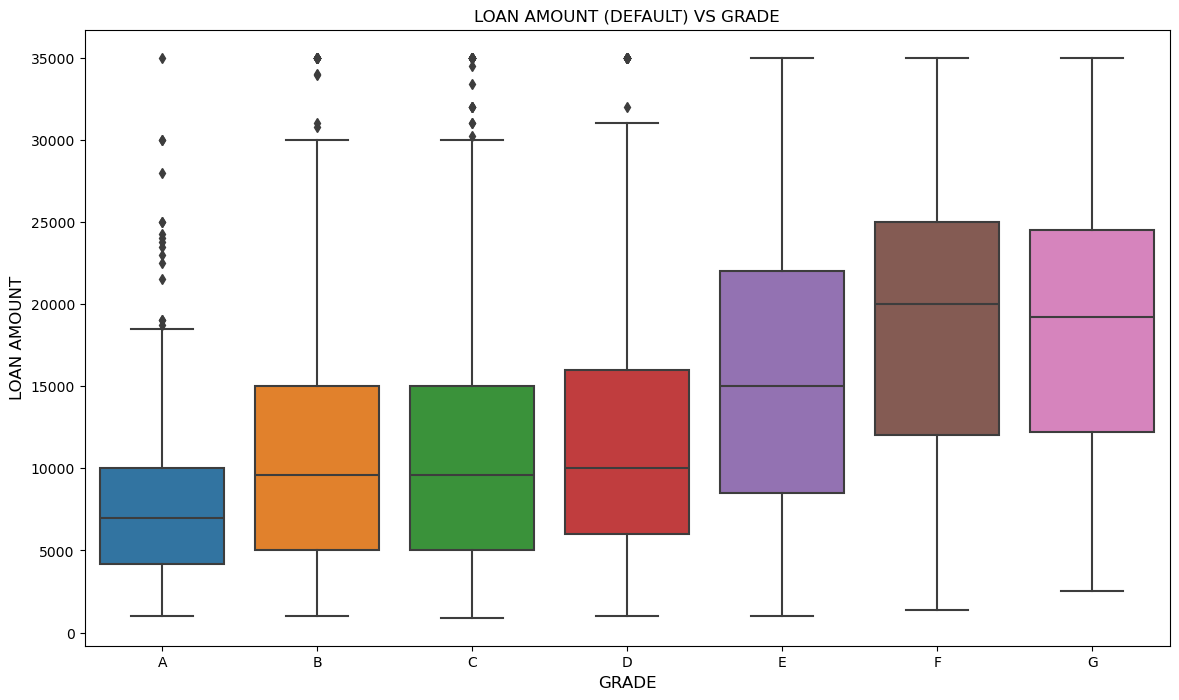

In [61]:
# Box plot for loan amount vs grade
plt.figure(figsize=(14,8))
viz = sns.boxplot(y='loan_amnt', 
            x='grade', 
            order=['A','B','C','D','E','F','G'],
            data=co_data)

# Naming the axis and title
viz.set_ylabel('LOAN AMOUNT', fontsize = 12)
viz.set_xlabel('GRADE', fontsize = 12)
viz.set_title('LOAN AMOUNT (DEFAULT) VS GRADE')
plt.show()

##### LOAN AMOUNT VS VERIFICATION STATUS

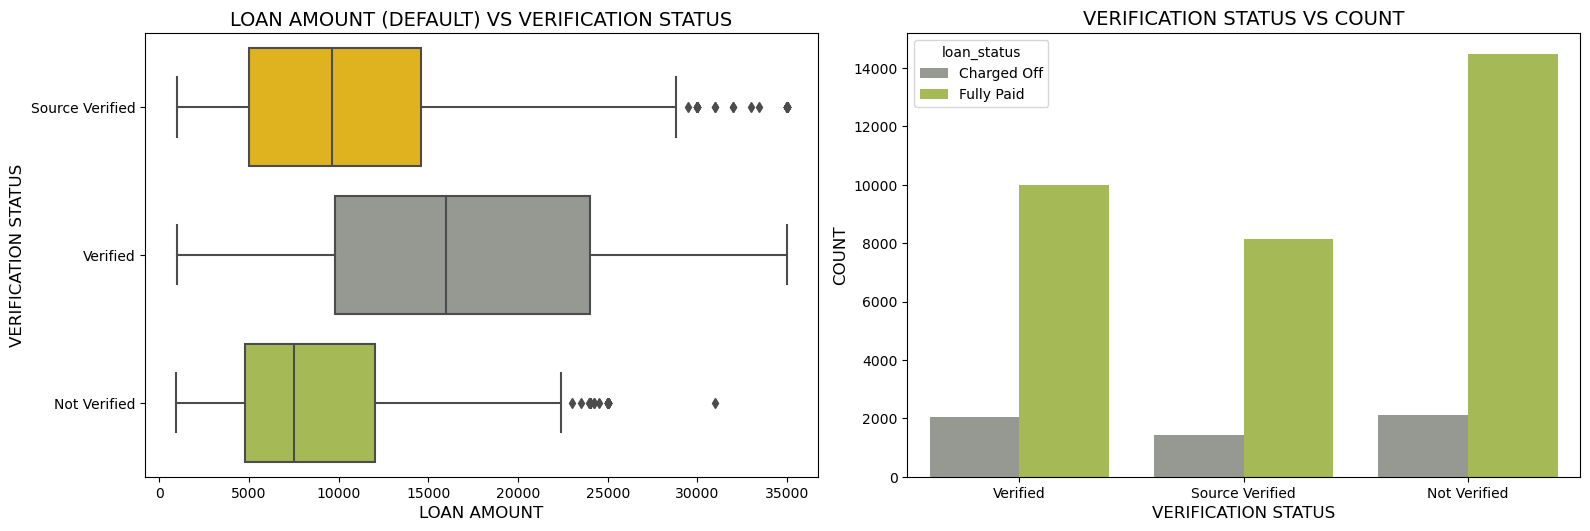

In [62]:
# Box plot for loan amount vs verification status
plt.figure(figsize=(16, 10))

# Subplot 1: Box plot for loan amount vs verification status
plt.subplot(2, 2, 1)
viz = sns.boxplot(x='loan_amnt', 
                  y='verification_status',
                  palette=["#FFC300", '#979A90', "#AECB46"],
                  data=co_data)
# Naming the axis and title
viz.set_xlabel('LOAN AMOUNT', fontsize=12)
viz.set_ylabel('VERIFICATION STATUS', fontsize=12)
viz.set_title('LOAN AMOUNT (DEFAULT) VS VERIFICATION STATUS', fontsize=14)

# Subplot 2: Count plot for verification status vs count by loan_status as hue
plt.subplot(2, 2, 2)
viz = sns.countplot(x=data['verification_status'],
                    hue=data['loan_status'].sort_values(), 
                    palette=['#979A90', "#AECB46"],
                    data=data)
# Naming the axis and title
viz.set_xlabel('VERIFICATION STATUS', fontsize=12)
viz.set_ylabel('COUNT', fontsize=12)
viz.set_title('VERIFICATION STATUS VS COUNT', fontsize=14)

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

##### INSTREST RATE VS INSTALLEMENT

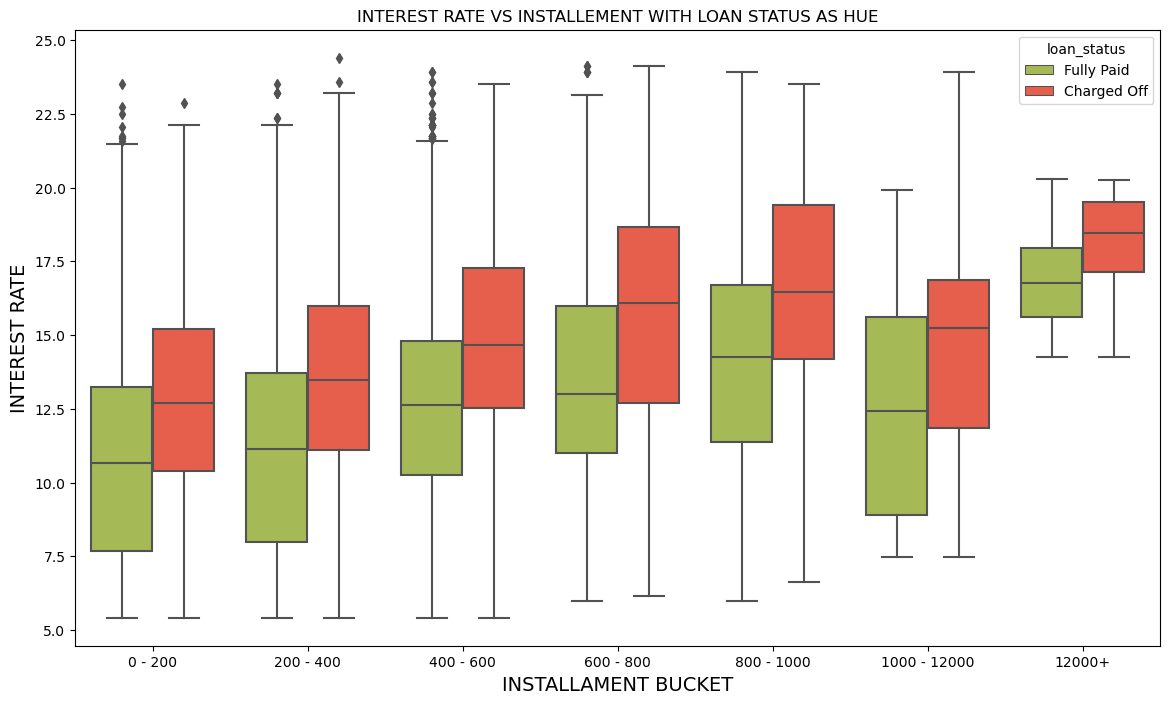

In [56]:
# Box plot for installment bucket vs interest rate by loan status as hue
plt.figure(figsize=(14,8))
viz = sns.boxplot(x='installment_bkt', 
            y='int_rate', 
            hue = 'loan_status',
            palette=['#AECB46', "#FF4C33"],
            data=data)

# Naming the axis and title
viz.set_xlabel('INSTALLAMENT BUCKET', fontsize = 14)
viz.set_ylabel('INTEREST RATE', fontsize = 14)
viz.set_title('INTEREST RATE VS INSTALLEMENT WITH LOAN STATUS AS HUE')
plt.show()

### OBSERVATION FOR BIVARIATE ANALYSIS

* Borrowers with 10+ years of employment length are more likely to charge off.
* Borrowers living on mortgage with loan amount greater than 12k are likely to charge off.
* Loan for debt consolidation, credit card, small business with average loan amount greater than 12000 are more likely to default.
* Loan with highest interest rate in all buckets are more likely to charge off.
* Loan provided for house, debt consolidation, small business with highest interest rate are more likely to charge off.
* Longer tenure has the higher interest rate and people in this term with interest rate between 15-20% is more likely to charge off.
* Shorter tenure has the lower interest rate and people in this term with interest rate between 10-15% is more likely to charge off.
* Borrower within grade E,F,G and with average loan amount greater than 15000 are more likely to charge off.
* Borrowers with verification status "not-verified" has loan amount with 5k to 12.5k are more likely to charge off.
* Borrowers with verification status "not-verified" and "verified" has a equal proportion in charge off.
* As the number of installment increase the borrowers with high interest rate are more likely to charge off.

### STEP 5 MULTIVARIATE ANALYSIS
Finally, we are going to be analysing multiple columns at once and draw insights based on their correlation

In [69]:
cor_data = data[['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'annual_inc', 'dti', 'inq_last_6mths', 'open_acc',     
          'pub_rec', 'revol_util','total_acc', 'total_pymnt_inv', 'pub_rec_bankruptcies',
         'issue_year', 'issue_month']]

In [70]:
cor_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,total_pymnt_inv,pub_rec_bankruptcies,issue_year,issue_month
0,5000,5000,4975.0,10.65,162.87,24000.0,27.65,1,3,0,83.7,9,5833.84,0.0,2011,12
1,2500,2500,2500.0,15.27,59.83,30000.0,1.00,5,3,0,9.4,4,1008.71,0.0,2011,12
2,2400,2400,2400.0,15.96,84.33,12252.0,8.72,2,2,0,98.5,10,3005.67,0.0,2011,12
3,10000,10000,10000.0,13.49,339.31,49200.0,20.00,1,10,0,21.0,37,12231.89,0.0,2011,12
5,5000,5000,5000.0,7.90,156.46,36000.0,11.20,3,9,0,28.3,12,5632.21,0.0,2011,12


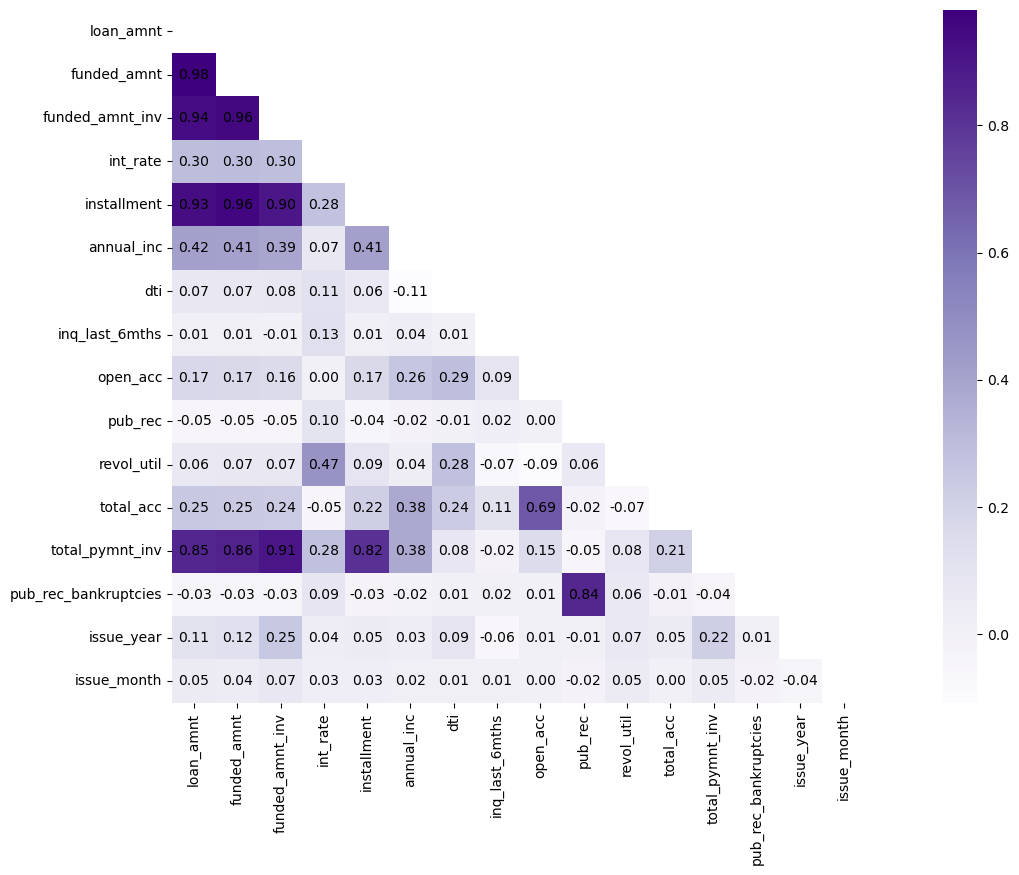

In [111]:
plt.figure(figsize=(20, 9))
correlation = cor_data.corr()

# Create a mask to hide the upper triangle (including the diagonal)
mask = np.triu(np.ones_like(correlation, dtype=bool))

# Create heatmap with masked upper triangle
sns.heatmap(correlation, annot=True, fmt='.2f', mask=mask, square=True, cmap='Purples')

# Loop through all cells in the heatmap and annotate each cell with its value
for i in range(len(correlation)):
    for j in range(i):
        plt.text(j + 0.5, i + 0.5, '{:.2f}'.format(correlation.iloc[i, j]),
                 ha='center', va='center', color='black')

plt.show()

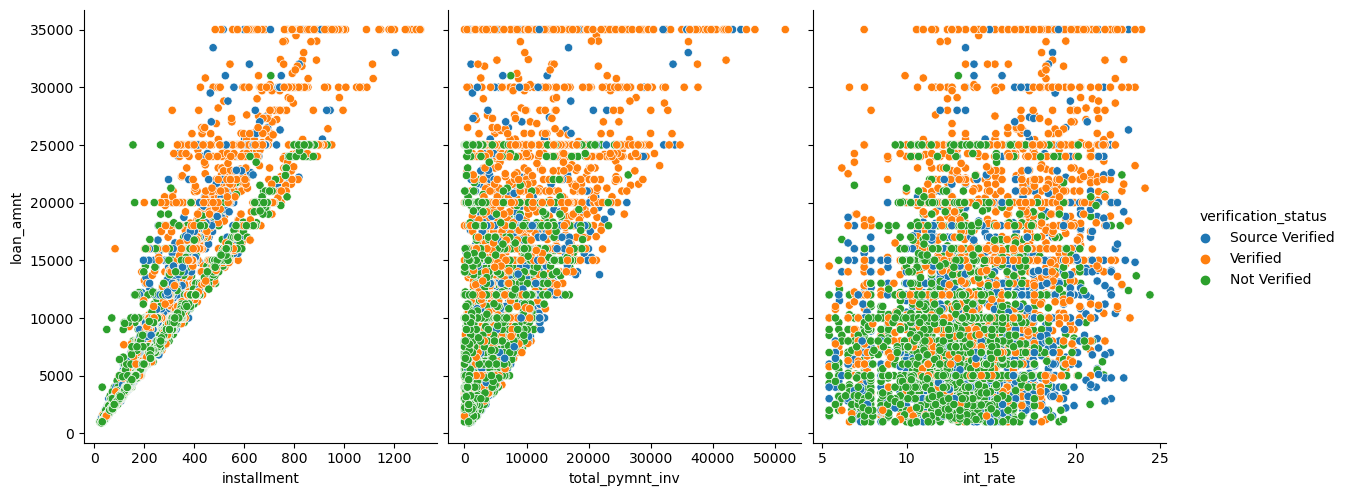

In [83]:
# Plotting a pair plot for 'installment', 'total_pymnt_inv', 'int_rate' vs loan amount by verification status as hue
sns.pairplot(co_data,
             x_vars=['installment', 'total_pymnt_inv', 'int_rate'],
             y_vars=['loan_amnt'],
             diag_kind=None,
             hue='verification_status',
             height=5,
             aspect=0.8,
             kind='scatter')

plt.show()

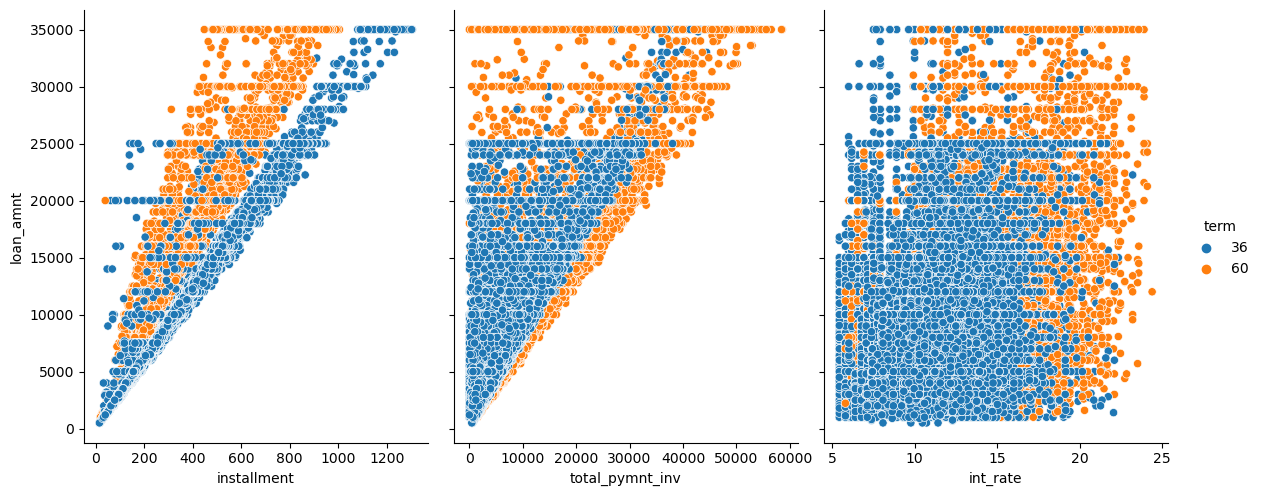

In [84]:
# Plotting a pair plot for 'installment', 'total_pymnt_inv', 'int_rate' vs loan amount by term as hue
sns.pairplot(data,
             x_vars=['installment', 'total_pymnt_inv', 'int_rate'],
             y_vars=['loan_amnt'],
             diag_kind=None,
             hue='term',
             height=5,
             aspect=0.8,
             kind='scatter')

plt.show()

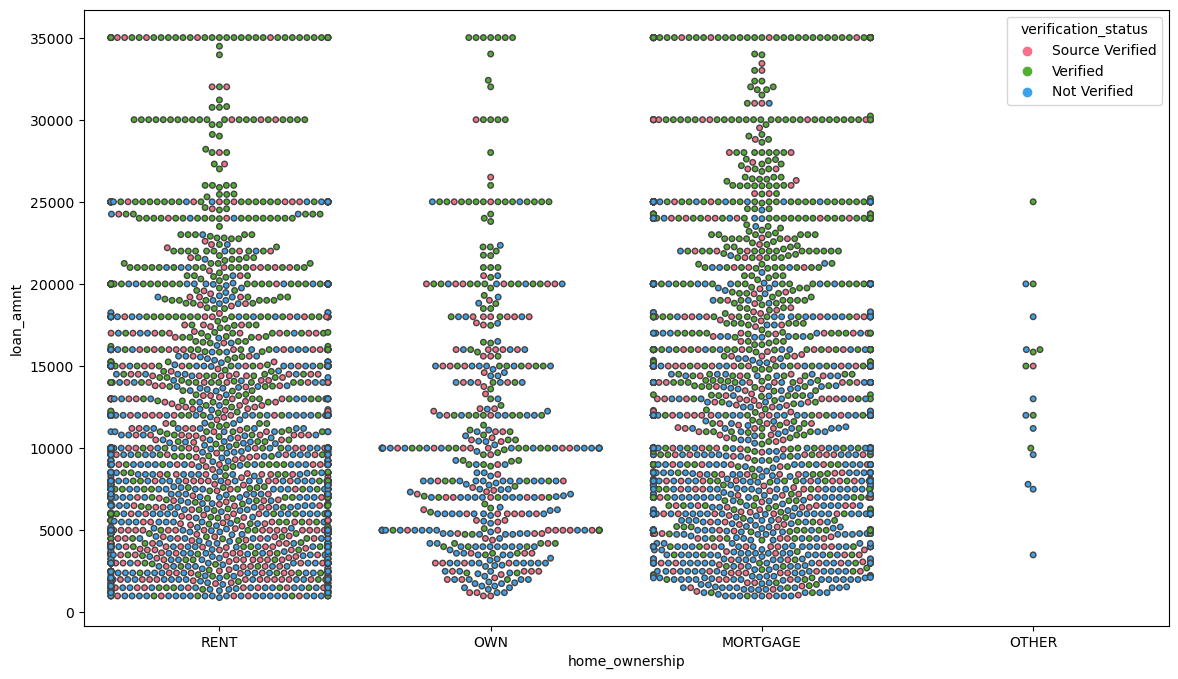

In [85]:
# Plotting a swarm plot for home ownership vs loan amount by term as hue
plt.figure(figsize=(14,8))
sns.swarmplot(x='home_ownership', 
              y='loan_amnt', 
              data=co_data,
              size=4,
              hue='verification_status',
              palette='husl',
              linewidth=1) 

plt.show()

### OBSERVATION FOR MULTIVARIATE ANALYSIS

* From Correlation Heatmap,
    * loan_amnt has strong positve correlation with installment, total_payment_inv.
    * loan_amnt has intermediate positive correlation with annual_inc, int_rate, total_acc.
    * open_acc has strong positive correlation with total_acc.
    * pub_rec has strong positve correlation with pub_rec_bankruptcies.
    
* From Pairplot,
    * When the loan amount increases, number of installment, total_pymnt_inv, int_rate also increases. 
    * Borrowers with verification status "Not-Verified" are most likely to get loan less than 25k (Charge off).
    * Borrowers with verification status "Verified" are most likely to get loan greater than 25k (Charge off).
    * Borrowers with lower term has higher installments comparatively.
    * Borrowers with 60 months term has highest share to total_pymnt_inv.

* From Swarmplot,
    * Across all categories of home ownership, borrowers with loan amount less than 25k are most like to be source verified.
    * Across all categories of home ownership, borrowers with loan amount greater than 25k gets verified.

### DRIVING FACTORS TO CHARGE OFF

* Borrowers with high interest and 10+ years of employment length.
* Borrowers living on mortgage with loan amount greater than 12000.
* Loan for debt consolidation, credit card, small business with loan amount greater than 12000.
* For any loan amount provided with an average interest rate higher than 13%.
* Loan provided for house purpose with average interest grater than 15%.
* Loan provided with an average of 12.5% interest rate for 36months of tenure.
* Loan provided with an average of 16.5% interest rate for 60months of tenure.
* Average loan amount greater than 15000 with grade E, F, G.
* Installments between 800 - 12000 with average interest greater than 15%.
* Average interest rate of 17% with installment greater than 12000.

***This Notebook is developed as a case study required for Executive PG Programme in Machine Learning & AI - IIIT, Bangalore***


*Reach out to contributers,*
* Varsha Kannan
* Anandh.M